**Project Name Machine Learning - Appliance Energy Prediction**

---
> Fifi Alfiaturrohmah (21102097)

> Abdul Jabbar Robbani (21102310)

> Nabila Afifatul Fajri  (21102247)






# **Deskripsi Dataset: Appliances Energy Prediction**


---

Dataset ini digunakan untuk membuat model regresi yang memprediksi penggunaan energi peralatan rumah tangga pada sebuah bangunan hemat energi. Dataset ini dipublikasikan di [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction) pada 14 Februari 2017 dan bersifat eksperimental.



**Karakteristik Dataset**


---



1.   Jenis Data: Multivariate, Time-Series
2.   Area Subjek: Computer Science, Teknik, dan Ilmu Lingkungan
3.   Tugas yang Diasosiasikan: Regression
4.   Tipe Fitur: Real
5.   Jumlah Data (Instances): 19,735
6.   Jumlah Fitur (Features): 28
7.   Missing Values: Tidak ada


**Informasi Dataset**


---



*   Dataset ini berisi data yang diambil setiap 10 menit selama kurang lebih 4,5 bulan.
*   Suhu dan kelembaban dalam rumah dimonitor menggunakan jaringan sensor ZigBee. Setiap node ZigBee mengirimkan data setiap 3,3 menit, yang kemudian dirata-rata menjadi interval 10 menit.
*   Data energi dicatat setiap 10 menit menggunakan m-bus energy meters.
*   Data cuaca diambil dari stasiun cuaca terdekat, yaitu Chievres Airport, Belgia, yang diperoleh dari dataset publik Reliable Prognosis (rp5.ru). Data cuaca tersebut digabungkan dengan data eksperimen berdasarkan kolom date and time.
*   Dua random variables dimasukkan untuk pengujian model regresi serta untuk menyaring atribut yang tidak prediktif.

**Kegunaan Dataset**


---


Dataset ini sangat cocok digunakan untuk tugas pembelajaran mesin berbasis Supervised Learning, khususnya pada kasus regresi. Model yang dikembangkan dapat memprediksi konsumsi energi perangkat rumah tangga berdasarkan suhu, kelembaban, serta kondisi cuaca eksternal.

**Referensi**


---


Untuk informasi lebih lanjut tentang rumah, proses pengumpulan data, serta code dan visualisasi data, dapat mengakses [GitHub Repository](https://github.com/LuisM78/Appliances-energy-prediction-data).

# **Data**

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings
import keras

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# pemberitahuan peringatan
warnings.filterwarnings("ignore")

In [ ]:
def load_data(path):
    '''
    Description : Fungsi ini mengambil data CSV dari lokasi yang ditentukan
                  (path bisa berupa URL atau path lokal) dan mengembalikannya
                  sebagai objek DataFrame pandas.

    Parameters :
      'path' - Lokasi dari file CSV yang akan dimuat (URL atau path lokal).

    Returns:
      DataFrame yang berisi data yang diambil dari file CSV.
    '''
    # Membaca file CSV dan mengembalikannya sebagai DataFrame
    return pd.read_csv(path)

# URL ke dataset yang disimpan di UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"

# Memanggil fungsi load_data untuk memuat dataset
df = load_data(url)

# Menampilkan lima baris pertama dari dataset untuk memastikan data dimuat dengan benar
print("Data Awal:")
print(df.head())

Data Awal:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed 

In [ ]:
# Menampilkan 5 baris acak dari dataset untuk mendapatkan gambaran awal
# Fungsi df.sample(5) akan memilih 5 baris secara acak dari DataFrame
print(df.sample(5))

                      date  Appliances  lights         T1       RH_1    T2  \
14226  2016-04-19 12:00:00          50       0  21.600000  39.466667  22.5   
16548  2016-05-05 15:00:00          50       0  23.700000  27.926667  24.5   
12962  2016-04-10 17:20:00          90      10  23.200000  37.760000  22.6   
15994  2016-05-01 18:40:00         120       0  23.633333  35.990000  21.6   
13439  2016-04-14 00:50:00          50       0  21.633333  41.860000  18.7   

        RH_2     T3       RH_3     T4  ...         T9       RH_9      T_out  \
14226  36.70  22.10  37.290000  22.00  ...  20.290000  39.326667  12.000000   
16548  24.90  23.20  32.933333  22.79  ...  20.790000  35.400000  19.400000   
12962  36.09  22.89  38.090000  22.10  ...  20.856667  39.260000  14.900000   
15994  35.40  22.79  35.090000  21.60  ...  19.600000  36.790000  13.433333   
13439  45.79  23.70  39.433333  21.70  ...  20.390000  45.966667   3.833333   

       Press_mm_hg     RH_out  Windspeed  Visibility  Td

In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset
# df.shape mengembalikan tuple (jumlah_baris, jumlah_kolom)

# Menampilkan jumlah total baris (instances) dalam dataset
print("Total Rows: ", df.shape[0])
# Menampilkan jumlah total kolom (features) dalam dataset
print("Total Columns: ", df.shape[1])

Total Rows:  19735
Total Columns:  29


In [ ]:
# Menampilkan informasi ringkas tentang dataset
# Informasi ini mencakup jumlah baris, kolom, tipe data,
# jumlah nilai non-null, serta penggunaan memori

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Menghitung jumlah baris duplikat dalam dataset
# df.duplicated() mengembalikan Series boolean di mana True menunjukkan baris duplikat
# Parameter 'keep' menentukan baris mana yang dianggap unik:
# 'first' mempertahankan baris pertama sebagai unik, sedangkan baris lainnya dianggap duplikat

# Menghitung total baris duplikat
duplicate_count = df.duplicated(keep='first').sum()
print("Total Duplicate Rows: ", duplicate_count)

Total Duplicate Rows:  0


In [ ]:
# Menghitung jumlah total nilai yang hilang (missing values) di seluruh dataset
missing_values_count = df.isna().sum().sum()

# Menampilkan jumlah nilai yang hilang
print("Jumlah Nilai Hilang: ", missing_values_count)

Jumlah Nilai Hilang:  0



Dataset ini terdiri dari 19.735 baris dan 29 fitur. Data tersebut tidak memiliki nilai yang hilang di mana pun, sehingga memudahkan dalam proses pembersihan data. Sebagian besar fitur berupa data numerik, kecuali satu fitur yang bertipe object dan dapat dikonversi menjadi datetime. Dengan demikian, proses preprocessing menjadi lebih sederhana karena hanya ada satu fitur kategorikal yang perlu diproses, sementara nilai yang hilang tidak perlu diatasi.

# **Variabel Pada Dataset**

In [ ]:
# Menampilkan nama-nama kolom dalam dataset
print("Nama Kolom Dataset:")
print(df.columns)

Nama Kolom Dataset:
Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [ ]:
# Menampilkan ringkasan statistik deskriptif dari dataset
print("Ringkasan Statistik Deskriptif:")
print(df.describe())

Ringkasan Statistik Deskriptif:
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813

Variabel dalam dataset ini mencakup Appliances, yang merupakan variabel target dengan rentang nilai dari 10 hingga 1080, dengan beberapa nilai puncak yang jarang ditemukan. Lights sebagian besar berisi nilai nol, namun terdapat beberapa outlier. Semua pengukuran suhu diukur dalam satuan Celsius, termasuk T1 (Suhu di Area Dapur) dan T2 (Suhu di Ruang Tamu), yang keduanya terlihat normal tanpa adanya outlier dan menunjukkan bahwa data tidak mencerminkan iklim dingin karena nilai minimum suhu lebih dari 0 pada semua fitur suhu. RH1 hingga RH2 (Kelembapan Ruangan) mengukur tingkat kelembapan di berbagai ruangan dalam rumah. Windspeed memiliki beberapa outlier, dan dari stasiun cuaca Chievres, terdapat beberapa data cuaca seperti Hg, RHout, Visibility, dan Tdewpoint.

# **Pembersihan Data**

In [ ]:
# Mengubah tipe data kolom 'date' menjadi tipe datetime
df['date'] = pd.to_datetime(df['date'])

# Menampilkan informasi tipe data kolom 'date' setelah perubahan
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


In [ ]:
# Menetapkan kolom 'date' sebagai indeks dataset
df.set_index(df.date.copy(deep=True), inplace=True)

# Mengubah semua nama kolom menjadi huruf kecil untuk konsistensi
df.columns = [col.lower() for col in df.columns]

Tidak ada banyak manipulasi yang dilakukan pada dataset ini karena dataset ini sudah siap untuk analisis data. Tidak ada nilai yang perlu diperbaiki. Yang dilakukan hanya mengubah tipe data variabel "date" menjadi tipe datetime dari pandas dan menjadikannya sebagai kolom indeks atau kunci utama untuk DataFrame, karena setiap observasi dalam dataset ini adalah unik.

# **Visualisasi Data Untuk Memahami Hubungan Antara Variabel**

<Axes: ylabel='Density'>

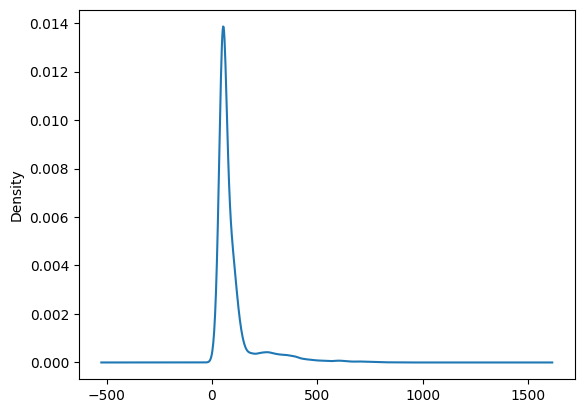

In [ ]:
# Membuat grafik KDE untuk variabel target (appliances)
df.appliances.plot(kind='kde')

Insight yang Ditemukan dari Grafik:


---


Dari grafik KDE ini, terlihat bahwa sebagian besar data untuk perangkat yang mengonsumsi daya berada dalam rentang 1 hingga 250. Hal ini menunjukkan bahwa mayoritas perangkat dalam dataset menggunakan daya dalam kisaran tersebut, dengan sedikit perangkat yang menggunakan daya lebih tinggi, yang terlihat dari distribusi data yang lebih sempit di bagian kanan grafik.

<Axes: xlabel='date'>

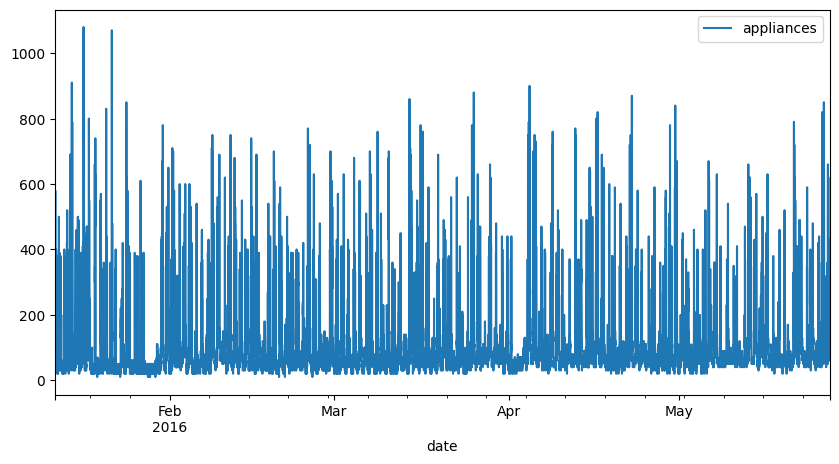

In [ ]:
# Membuat grafik lineplot untuk appliances vs Datetime
df[['appliances']].plot(figsize=(10,5))

Insight yang Ditemukan dari Grafik:


---


Dari grafik ini, terlihat adanya pola yang serupa setiap dua bulan, namun belum bisa dipastikan karena data hanya tersedia selama 5 bulan. Grafik menunjukkan bahwa data dimulai dari pertengahan Januari hingga Mei, dan tren penggunaan perangkat sepertinya mengikuti siklus tertentu, meskipun durasi data yang terbatas tidak memungkinkan untuk menarik kesimpulan yang lebih kuat mengenai pola jangka panjang.

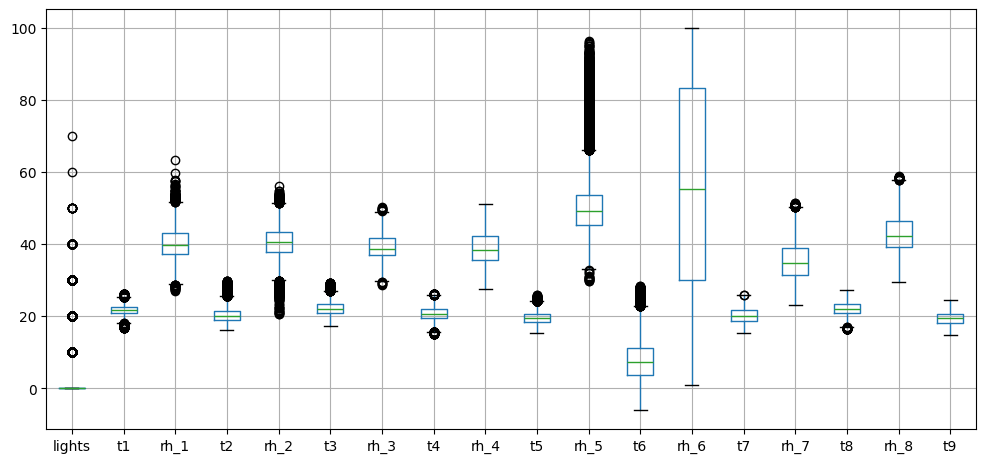

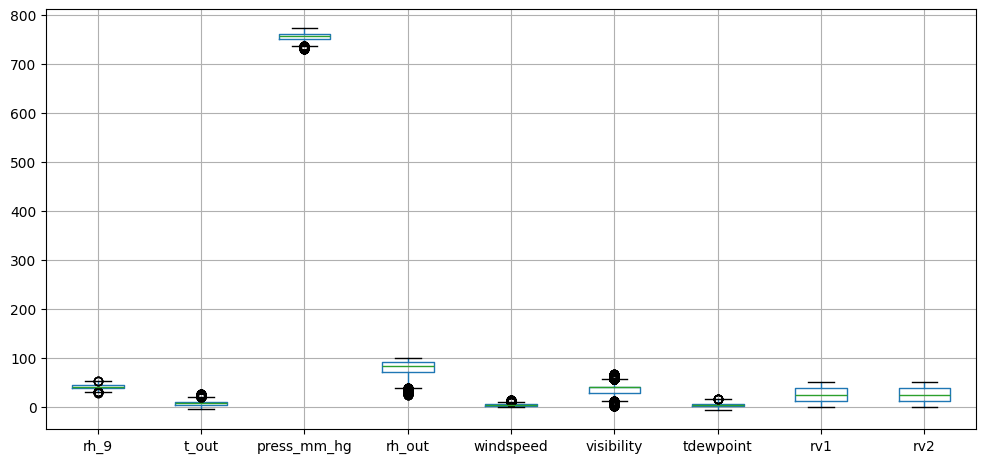

In [ ]:
# Membuat boxplot untuk variabel dari kolom ke-2 hingga ke-20
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
df.iloc[:,2:20].boxplot()
plt.show()

# Membuat boxplot untuk variabel mulai dari kolom ke-20
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
df.iloc[:,20:].boxplot()
plt.show()

Insight yang Ditemukan dari Grafik:


---


Dari grafik ini, beberapa hal yang dapat disimpulkan adalah:

1. Sebagian besar kolom dipengaruhi oleh outlier, kecuali beberapa kolom yang tampak lebih terdistribusi normal.
2. Hampir semua fitur menunjukkan distribusi yang mendekati normal, yang sangat berguna dalam pembangunan model, karena banyak algoritma machine learning lebih efektif dengan data yang terdistribusi normal.
3. Terlihat bahwa rh5 dan rh6 memiliki rentang nilai antara 1 hingga 100, sementara variabel kelembapan ruangan lainnya memiliki nilai maksimum sekitar 60.
4. Pada plot kedua, sepertinya variabel-variabel memiliki lebih sedikit outlier dan press_mm_hg perlu dilakukan scaling agar lebih sesuai dengan skala variabel lainnya.







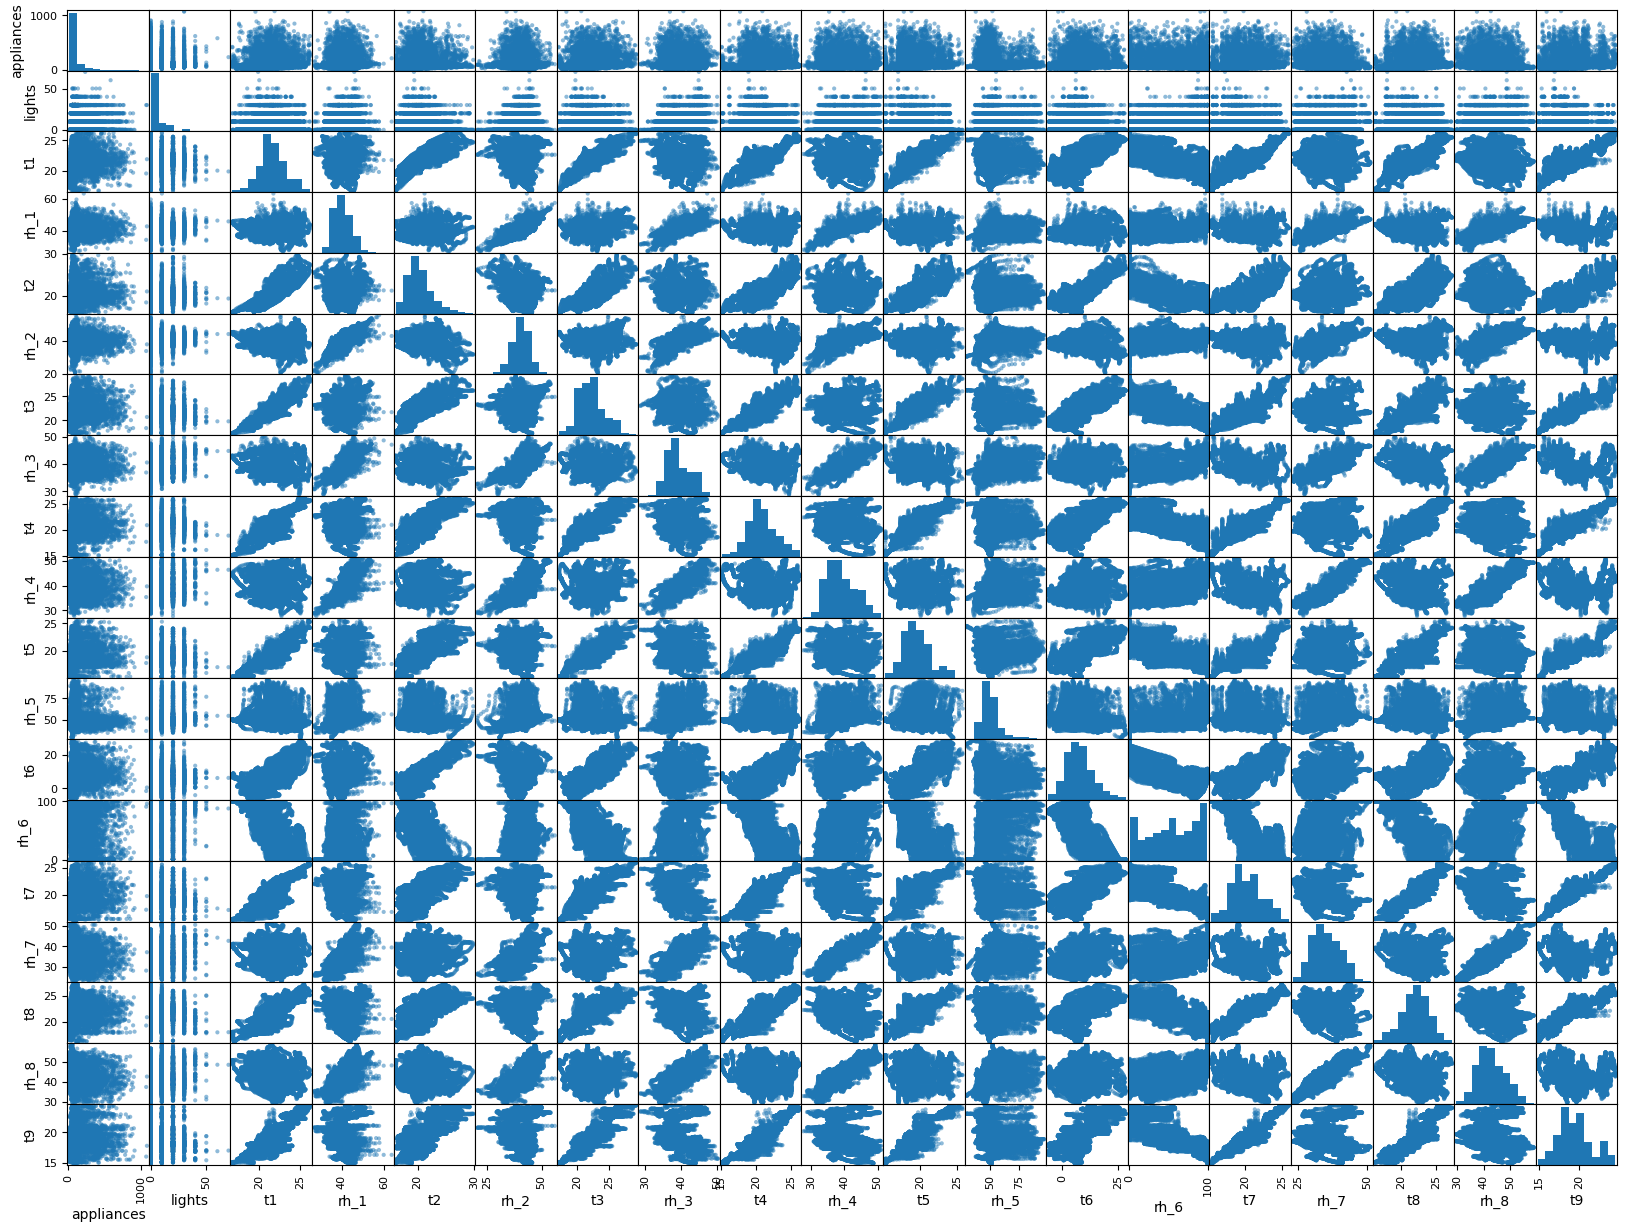

In [ ]:
# Membuat scatter plot untuk semua variabel
pd.plotting.scatter_matrix(df.iloc[:,:20], figsize=(20,15))
plt.show()

Insight yang Ditemukan dari Grafik:


---


Dari grafik scatter plot ini, beberapa insight yang dapat disimpulkan adalah:

1. Variabel target (appliances) tidak menunjukkan korelasi yang jelas dengan kolom lainnya, yang mengindikasikan bahwa hubungan antara target dan fitur lain mungkin lebih kompleks atau tidak linear.
2. Lights tampaknya memiliki beberapa kategori yang terlihat dari distribusi data yang berbeda pada plotnya.
3. Setiap variabel room_humidity (rh) menunjukkan korelasi yang kuat satu sama lain, yang menunjukkan bahwa kelembapan di berbagai ruangan dalam rumah mungkin dipengaruhi oleh faktor yang sama atau memiliki pola yang serupa.
4. Setiap variabel temperature (t) juga saling berkorelasi, yang menunjukkan bahwa suhu di berbagai area dalam rumah mungkin mengikuti pola atau tren yang sama.

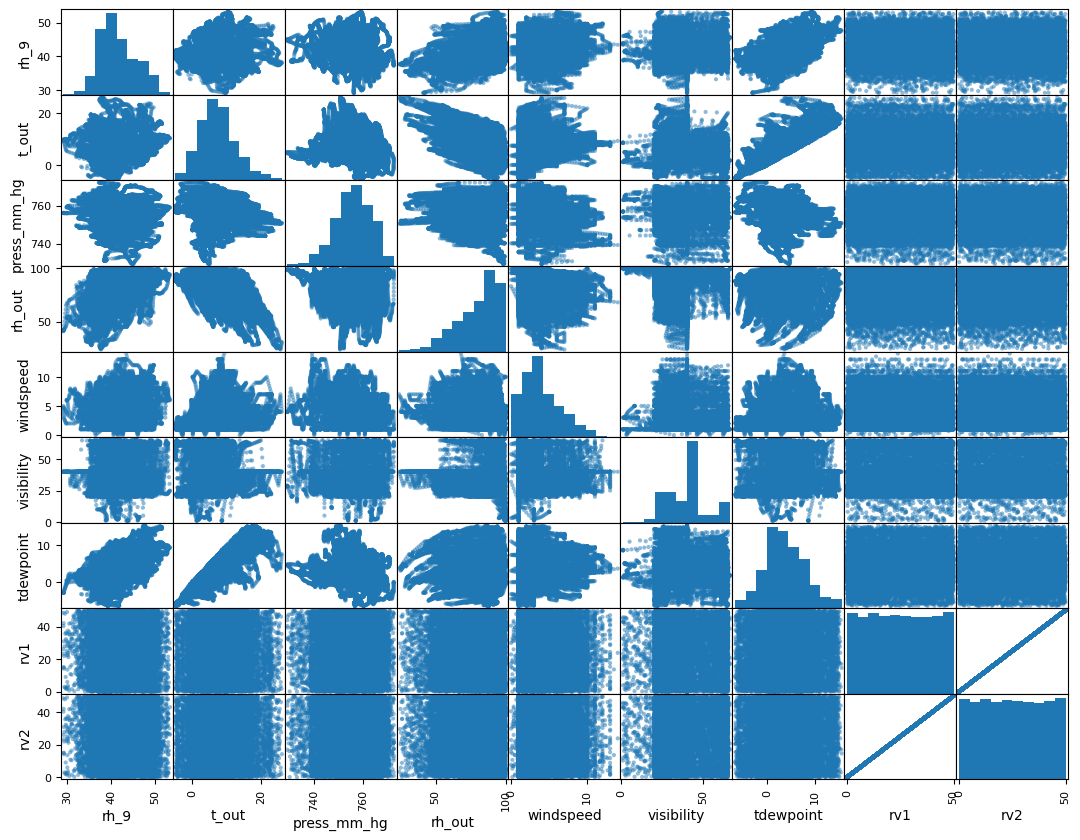

In [ ]:
# Membuat scatter plot untuk variabel dari kolom ke-20 dan seterusnya
pd.plotting.scatter_matrix(df.iloc[:,20:], figsize=(13,10))
plt.show()

Insight yang Ditemukan dari Grafik:


---


Dari grafik ini, beberapa insight yang ditemukan adalah:

1. Tidak ada variabel yang menunjukkan korelasi yang kuat dengan variabel lainnya, yang berarti setiap variabel memberikan informasi yang berbeda tentang variabel target, hal ini bisa menjadi keuntungan karena meningkatkan keragaman informasi dalam prediksi.
2. RV1 dan RV2 terlihat sangat berkorelasi dan memiliki distribusi yang hampir sama dengan variabel lainnya. Hal ini menunjukkan bahwa kedua variabel ini memberikan informasi yang sama, sehingga dapat dipertimbangkan untuk menghapus salah satunya tanpa mempengaruhi hasil prediksi secara signifikan.

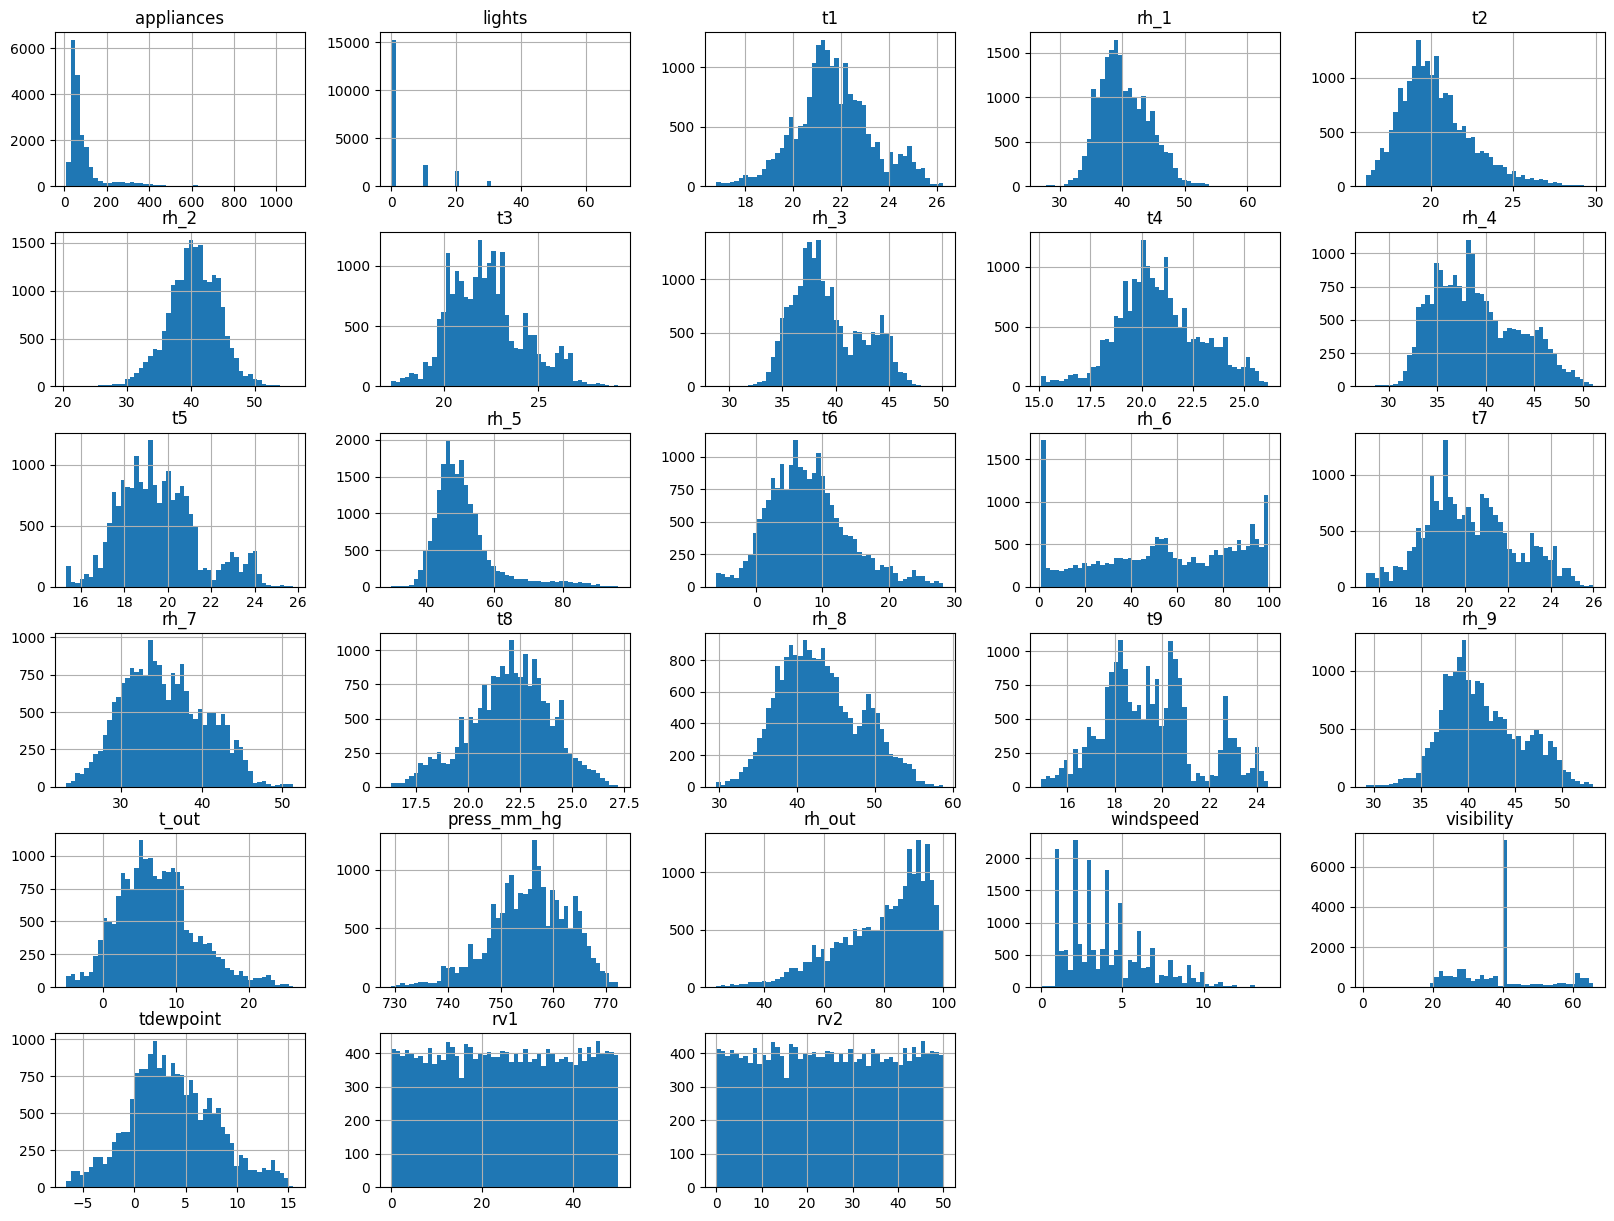

In [ ]:
# Membuat histogram untuk semua variabel
df.iloc[:,1:].hist(bins=50, figsize=(20,15))
plt.show()

Insight yang Ditemukan dari Grafik:


---


Dari histogram ini, beberapa insight yang ditemukan adalah:

1. Hampir semua variabel menunjukkan distribusi yang mendekati normal, yang sangat baik untuk membangun model prediksi yang akurat.
2. Seperti yang terlihat sebelumnya, RV1 dan RV2 tampaknya merupakan variabel yang identik, memberikan informasi yang sama.
3. Visibility memiliki lebih banyak nilai pada angka 40 dan juga menunjukkan beberapa outlier, yang mungkin perlu diperhatikan dalam tahap preprocessing untuk mengurangi dampak outlier terhadap model.

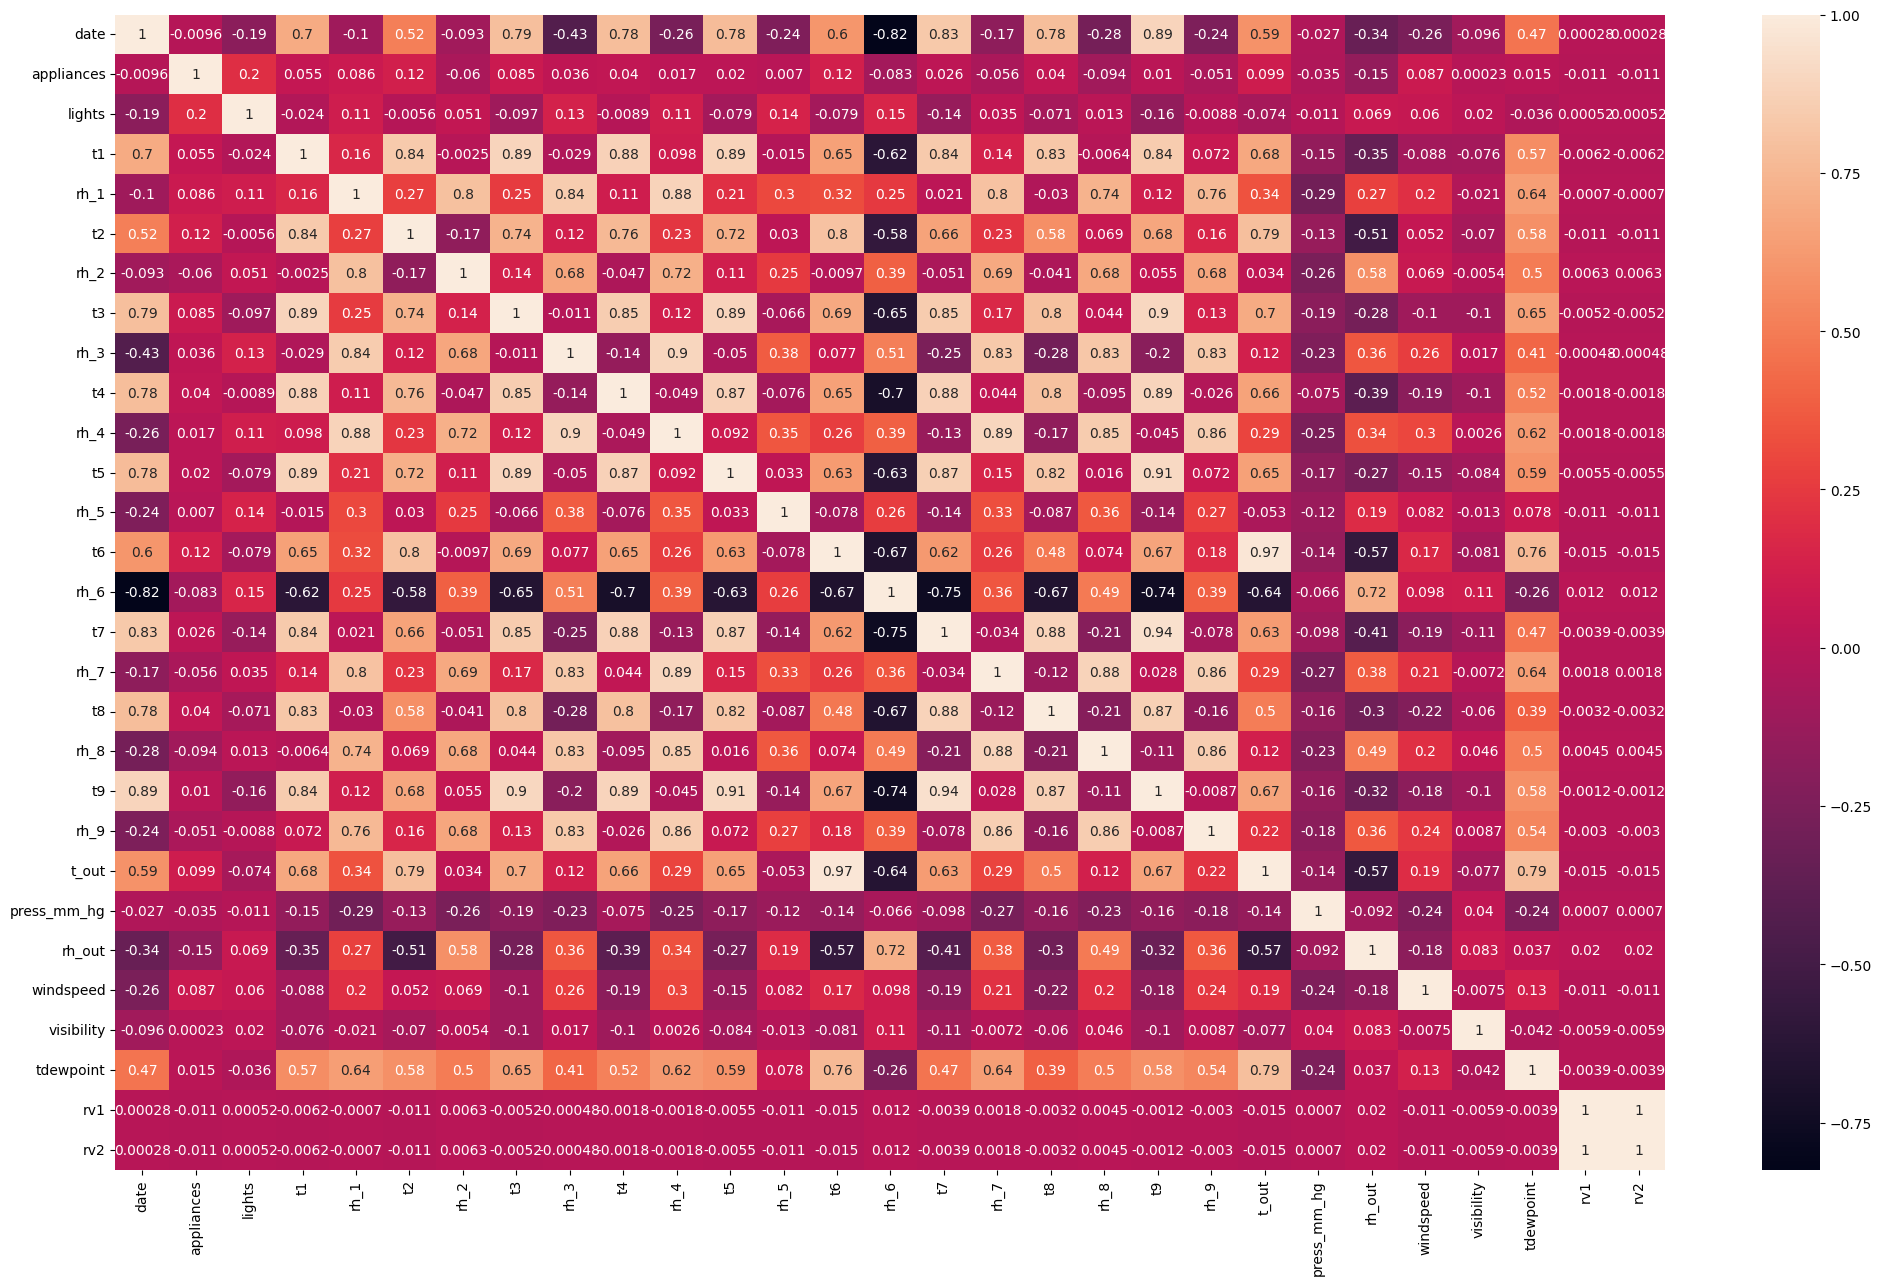

In [ ]:
# Membuat heatmap korelasi untuk semua variabel
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()

Insight yang Ditemukan dari Grafik:


---


Dari heatmap korelasi ini, beberapa insight yang ditemukan adalah:

1. Tidak ada variabel yang secara langsung berkorelasi dengan variabel target (appliances). Korelasi tertinggi dengan variabel target adalah pada lights, dengan nilai hanya sekitar 0.2, yang menunjukkan hubungan yang sangat lemah.
2. Terdapat multikolinearitas antar variabel, di mana beberapa variabel saling berkorelasi positif atau negatif dengan kuat satu sama lain. Hal ini perlu diperhatikan karena multikolinearitas dapat mempengaruhi kualitas model, terutama pada model yang sensitif terhadap korelasi antar variabel.

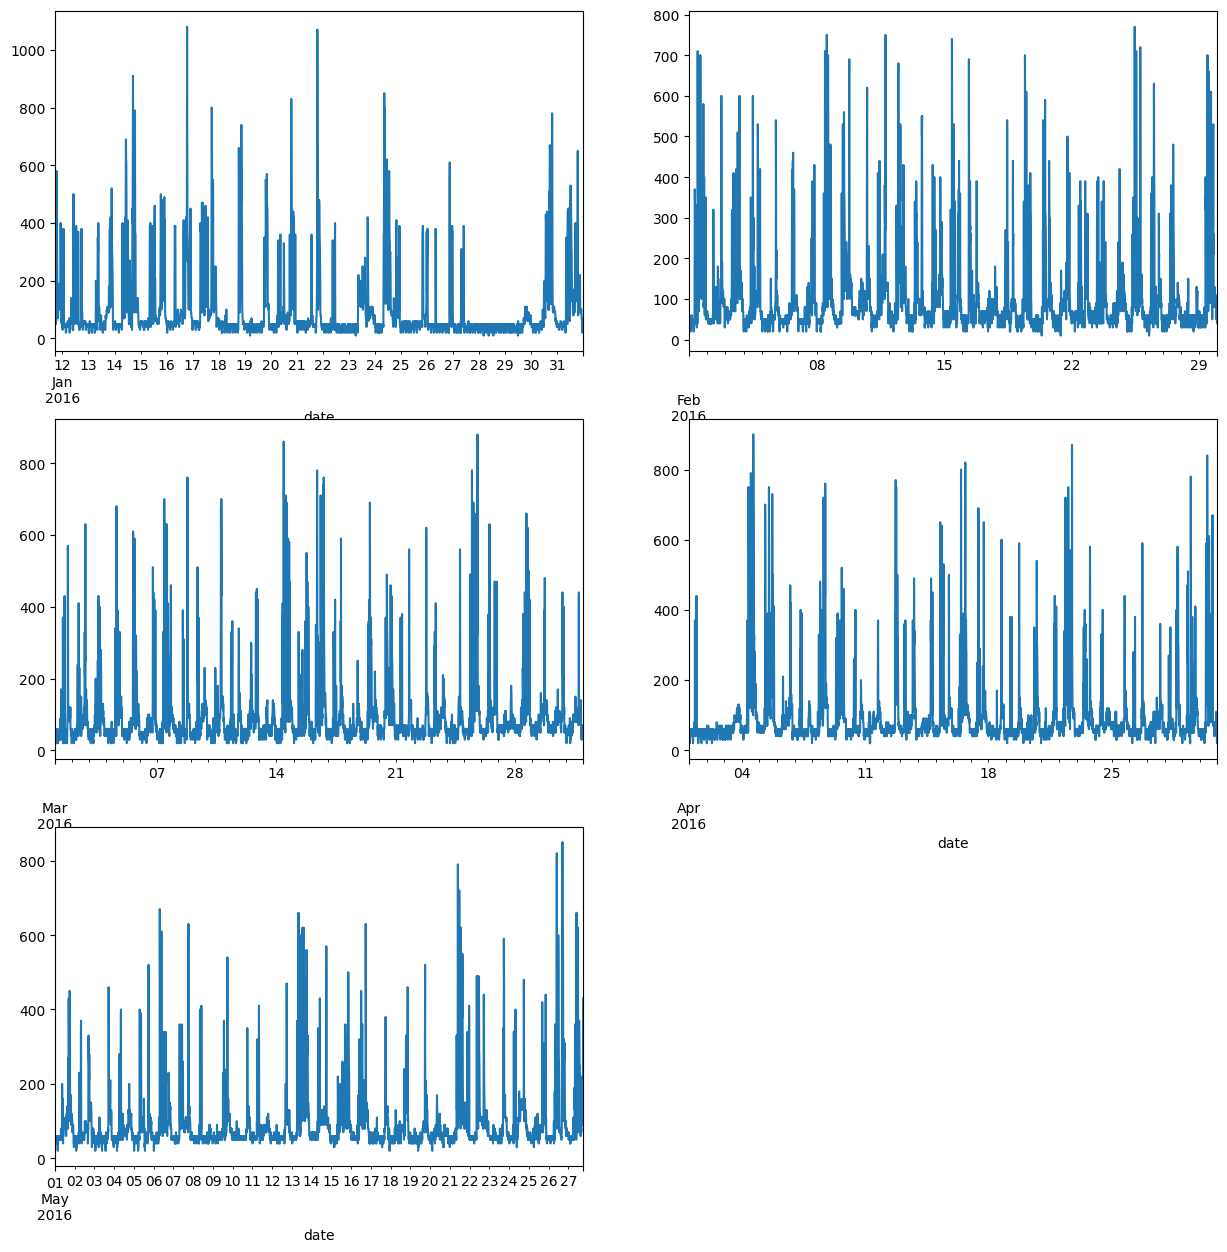

In [ ]:
# Membuat plot untuk konsumsi appliances berdasarkan tanggal untuk bulan yang berbeda secara terpisah
for month in [1, 2, 3, 4, 5]:
    plt.subplot(3, 2, month)
    df[df['date'].dt.month == month]['appliances'].plot(figsize=(15,15))

Insight yang Ditemukan dari Grafik:


---


Dari grafik ini, dapat dilihat bahwa pola konsumsi perangkat (appliances) untuk bulan-bulan yang berbeda menunjukkan beberapa kesamaan:
1. Januari, Maret, dan Mei menunjukkan pola yang mirip satu sama lain dalam konsumsi daya perangkat.
2. Februari dan April memiliki pola yang serupa, yang menunjukkan adanya tren atau faktor musiman yang mempengaruhi konsumsi daya perangkat pada bulan-bulan tersebut.

# **Feature Engineering & Data Pre-processing**

In [ ]:
# Menyalin dataset untuk manipulasi lebih lanjut
df_copy = df.copy(deep=True)
SEED = 42

In [ ]:
df_copy

date  appliances  lights         t1  \
date                                                                     
2016-01-11 17:00:00 2016-01-11 17:00:00          60      30  19.890000   
2016-01-11 17:10:00 2016-01-11 17:10:00          60      30  19.890000   
2016-01-11 17:20:00 2016-01-11 17:20:00          50      30  19.890000   
2016-01-11 17:30:00 2016-01-11 17:30:00          50      40  19.890000   
2016-01-11 17:40:00 2016-01-11 17:40:00          60      40  19.890000   
...                                 ...         ...     ...        ...   
2016-05-27 17:20:00 2016-05-27 17:20:00         100       0  25.566667   
2016-05-27 17:30:00 2016-05-27 17:30:00          90       0  25.500000   
2016-05-27 17:40:00 2016-05-27 17:40:00         270      10  25.500000   
2016-05-27 17:50:00 2016-05-27 17:50:00         420      10  25.500000   
2016-05-27 18:00:00 2016-05-27 18:00:00         430      10  25.500000   

                          rh_1         t2       rh_2         t3       rh_3  \
date                                                                         
2016-01-11 17:00:00  47.596667  19.200000  44.790000  19.790000  44.730000   
2016-01-11 17:10:00  46.693333  19.200000  44.722500  19.790000  44.790000   
2016-01-11 17:20:00  46.300000  19.200000  44.626667  19.790000  44.933333   
2016-01-11 17:30:00  46.066667  19.200000  44.590000  19.790000  45.000000   
2016-01-11 17:40:00  46.333333  19.200000  44.530000  19.790000  45.000000   
...                        ...        ...        ...        ...        ...   
2016-05-27 17:20:00  46.560000  25.890000  42.025714  27.200000  41.163333   
2016-05-27 17:30:00  46.500000  25.754000  42.080000  27.133333  41.223333   
2016-05-27 17:40:00  46.596667  25.628571  42.768571  27.050000  41.690000   
2016-05-27 17:50:00  46.990000  25.414000  43.036000  26.890000  41.290000   
2016-05-27 18:00:00  46.600000  25.264286  42.971429  26.823333  41.156667   

                            t4  ...         t9     rh_9      t_out  \
date                            ...                                  
2016-01-11 17:00:00  19.000000  ...  17.033333  45.5300   6.600000   
2016-01-11 17:10:00  19.000000  ...  17.066667  45.5600   6.483333   
2016-01-11 17:20:00  18.926667  ...  17.000000  45.5000   6.366667   
2016-01-11 17:30:00  18.890000  ...  17.000000  45.4000   6.250000   
2016-01-11 17:40:00  18.890000  ...  17.000000  45.4000   6.133333   
...                        ...  ...        ...      ...        ...   
2016-05-27 17:20:00  24.700000  ...  23.200000  46.7900  22.733333   
2016-05-27 17:30:00  24.700000  ...  23.200000  46.7900  22.600000   
2016-05-27 17:40:00  24.700000  ...  23.200000  46.7900  22.466667   
2016-05-27 17:50:00  24.700000  ...  23.200000  46.8175  22.333333   
2016-05-27 18:00:00  24.700000  ...  23.200000  46.8450  22.200000   

                     press_mm_hg     rh_out  windspeed  visibility  tdewpoint  \
date                                                                            
2016-01-11 17:00:00        733.5  92.000000   7.000000   63.000000   5.300000   
2016-01-11 17:10:00        733.6  92.000000   6.666667   59.166667   5.200000   
2016-01-11 17:20:00        733.7  92.000000   6.333333   55.333333   5.100000   
2016-01-11 17:30:00        733.8  92.000000   6.000000   51.500000   5.000000   
2016-01-11 17:40:00        733.9  92.000000   5.666667   47.666667   4.900000   
...                          ...        ...        ...         ...        ...   
2016-05-27 17:20:00        755.2  55.666667   3.333333   23.666667  13.333333   
2016-05-27 17:30:00        755.2  56.000000   3.500000   24.500000  13.300000   
2016-05-27 17:40:00        755.2  56.333333   3.666667   25.333333  13.266667   
2016-05-27 17:50:00        755.2  56.666667   3.833333   26.166667  13.233333   
2016-05-27 18:00:00        755.2  57.000000   4.000000   27.000000  13.200000   

                           rv1        rv2  
date                                       
2016

In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = df_copy.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 date           0
appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [ ]:
# Mengganti missing values pada kolom numerik dengan rata-rata (mean)
df_copy.fillna(df_copy.mean(), inplace=True)

# Atau, menghapus baris dengan missing values
# df_copy.dropna(inplace=True)

In [ ]:
# Memeriksa apakah masih ada missing values setelah penanganan
missing_values_after = df_copy.isna().sum()
print("Jumlah nilai yang hilang setelah penanganan:\n", missing_values_after)

Jumlah nilai yang hilang setelah penanganan:
 date           0
appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [ ]:
# Memisahkan fitur dan target
y = df_copy['appliances']
df_copy.drop('appliances', inplace=True, axis=1)
X = df_copy

In [ ]:
# Pembagian data menjadi data latih dan uji
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.13, random_state=SEED)

In [ ]:
print("X_train : ", x_train.shape)
print("y_train : ", y_train.shape)

print("X_test : ", x_test.shape)
print("y_test : ", y_test.shape)

# Menghapus variabel yang tidak lagi diperlukan untuk menghemat memori
del X, y, df

X_train :  (17169, 28)
y_train :  (17169,)
X_test :  (2566, 28)
y_test :  (2566,)


In [ ]:
# Memeriksa apakah ada missing values pada data latih
print(x_train.isna().sum().sum())

0


In [ ]:
# Handling Outliers & Outlier treatments

# Membuat Transformer kustom untuk menangani outliers
class HandleOutliers(BaseEstimator, TransformerMixin):

    # Inisialisasi konstruktor yang tidak melakukan apa-apa
    def __init__(self):
        return None

    def fit(self, X, y=None):
        '''
        Deskripsi : Metode ini mencatat nilai 90 dan 10 percentile dari setiap fitur dalam dataframe,
                    sehingga kita dapat menggantikan outliers dengan nilai dari percentile yang tercatat.
        Parameter:
            X : Dataframe yang ingin dihitung nilai percentilenya.
            y : Tidak diperlukan dalam metode ini.
        '''
        outlier_estimator_dict = {}  # Kamus untuk menyimpan batas atas dan bawah tiap kolom
        for col in X.columns:
            # Menghitung batas atas (90th percentile) dan batas bawah (10th percentile) untuk setiap kolom
            upper_bound = np.percentile(X[col], 90)
            lower_bound = np.percentile(X[col], 10)

            # Menyimpan nilai upper_bound dan lower_bound ke dalam kamus
            outlier_estimator_dict[col] = {
                "upper_bound": upper_bound,
                "lower_bound": lower_bound
            }

        # Menyimpan kamus ini untuk digunakan pada transformasi data
        self.outlier_estimator_dict = outlier_estimator_dict
        return self

    def transform(self, X, y=None):
        '''
        Deskripsi : Metode ini mengganti outliers dengan nilai yang tercatat dari percentile
                    masing-masing kolom.
        Parameter:
            X : Dataframe yang ingin diganti nilai outliers-nya.
        Returns:
            Dataframe yang sudah diproses tanpa outliers.
        '''
        for col in X.columns:
            # Mengambil batas atas dan bawah yang sudah dihitung pada metode fit()
            col_dict = self.outlier_estimator_dict[col]

            # Mengganti nilai yang lebih besar dari upper_bound dengan upper_bound
            X[col] = np.where(X[col] > col_dict['upper_bound'], col_dict['upper_bound'], X[col])
            # Mengganti nilai yang lebih kecil dari lower_bound dengan lower_bound
            X[col] = np.where(X[col] < col_dict['lower_bound'], col_dict['lower_bound'], X[col])

        # Menyimpan nama kolom terakhir yang telah diproses
        self.final_column_names = X.columns
        return X

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Membuat Transformer kustom untuk menambahkan fitur PCA

class AddPcaFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, number_of_pca_columns=None):
        '''
        Parameter :
            number_of_pca_columns : (Int) Jumlah dimensi akhir yang diinginkan.
        '''
        self.number_of_pca_columns = number_of_pca_columns
        return None

    def fit(self, X, y=None):
        '''
        Deskripsi : Metode ini melatih data menggunakan algoritma PCA untuk mengurangi dimensi.
        Parameter:
            X : Dataframe yang akan dilatih menggunakan algoritma PCA
        '''
        if self.number_of_pca_columns != None:
            # Menentukan jumlah komponen utama (PCA) yang diinginkan
            self.pca = PCA(n_components=self.number_of_pca_columns)
            # Melatih PCA pada data
            self.pca.fit(X)
        return self

    def transform(self, X, y=None):
        '''
        Parameter :
            X : Dataframe yang ingin dikurangi dimensinya menggunakan PCA
        Returns :
            Dataframe yang berisi fitur PCA yang ditambahkan ke dalam dataframe input.
        '''
        if self.number_of_pca_columns != None:
            # Menyusun nama kolom untuk fitur PCA
            pca_column_names = [f'pca_{val}' for val in range(1, self.number_of_pca_columns + 1)]
            # Mengubah data X menggunakan PCA
            pca_features = self.pca.transform(X)
            # Mengubah hasil PCA menjadi dataframe dengan nama kolom yang sesuai
            pca_features = pd.DataFrame(pca_features, columns=pca_column_names, index=X.index)
            # Menggabungkan fitur PCA yang dihasilkan dengan dataframe input X
            X = pd.concat([X, pca_features], axis=1)

        return X

In [ ]:
# Custom Transformers for adding extra features

class AddCentralTendencyFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, measure):
        '''
        Parameter :
            measure : 'mean' atau 'median', tergantung fitur mana yang ingin Anda tambahkan.
        '''
        self.measure = measure
        return None

    def fit(self, X, y=None):
        '''
        Deskripsi : Metode ini hanya mengembalikan X karena transformer ini tidak memerlukan proses fitting.
        '''
        return self

    def transform(self, X, y=None):
        '''
        Deskripsi : Menambahkan kolom rata-rata (mean) atau median untuk kolom suhu dan kelembapan untuk setiap observasi.
        Parameter :
            X : Dataframe yang akan dihitung fitur rata-rata atau median.
        Returns :
            Dataframe input yang telah digabungkan dengan fitur yang dihitung.
        '''
        if self.measure.lower() == 'mean':
            # Menambahkan kolom 'avg_house_temp' yang merupakan rata-rata suhu rumah untuk setiap observasi
            X['avg_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col) < 3))]].mean(axis=1)
            # Menambahkan kolom 'avg_humidity_percentage' yang merupakan rata-rata kelembapan untuk setiap observasi
            X['avg_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col) < 5))]].mean(axis=1)

        else:
            # Menambahkan kolom 'med_house_temp' yang merupakan median suhu rumah untuk setiap observasi
            X['med_house_temp'] = X[[col for col in X.columns if (('t' in col) and (len(col) < 3))]].median(axis=1)
            # Menambahkan kolom 'med_humidity_percentage' yang merupakan median kelembapan untuk setiap observasi
            X['med_humidity_percentage'] = X[[col for col in X.columns if (('rh_' in col) and (len(col) < 5))]].median(axis=1)

        return X

In [ ]:
class AddDateFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y=None):
        '''
        Deskripsi : Metode ini hanya mengembalikan X karena transformer ini tidak memerlukan fitting.
        '''
        return self

    def transform(self, X, y=None):
        '''
        Deskripsi : Menambahkan fitur hari (day) dan bulan (month) dari kolom tanggal.
        Fitur ini memberikan informasi tambahan berdasarkan komponen tanggal yang bisa membantu dalam analisis atau prediksi musiman.

        Parameter :
            X : Dataframe yang berisi kolom tanggal (date).

        Returns :
            Dataframe yang telah diperkaya dengan dua kolom baru: 'day' dan 'month', serta kolom 'date' yang dihapus.
        '''
        # Menambahkan kolom 'day' yang berisi hari dari kolom tanggal
        X['day'] = X.date.dt.day
        # Menambahkan kolom 'month' yang berisi bulan dari kolom tanggal
        X['month'] = X.date.dt.month

        # Menghapus kolom 'date' setelah fitur baru ditambahkan
        return X.drop('date', axis=1)

In [ ]:
class RemoveCorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y):
        '''
        Deskripsi : Menghapus fitur yang memiliki korelasi tinggi satu sama lain tetapi korelasi rendah dengan target.
        X : Dataframe yang hanya berisi fitur (tanpa target)
        y : Series yang berisi target variabel (misalnya, variabel yang ingin diprediksi)
        '''
        col_corr = set()  # Set untuk menyimpan nama kolom yang akan dihapus
        corr_matrix = X.corr()  # Matriks korelasi antar fitur

        # Iterasi melalui setiap pasangan fitur untuk memeriksa korelasi
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                # Jika korelasi antar fitur lebih besar dari threshold (0.85), periksa lebih lanjut
                if abs(corr_matrix.iloc[i, j]) > 0.85:
                    # Menghitung korelasi antara masing-masing fitur dengan target
                    corr_i, _ = pearsonr(y, X.iloc[:, i])  # Korelasi fitur i dengan target
                    corr_j, _ = pearsonr(y, X.iloc[:, j])  # Korelasi fitur j dengan target

                    # Memilih fitur yang memiliki korelasi lebih rendah dengan target untuk dihapus
                    if abs(corr_i) < abs(corr_j):
                        colname = corr_matrix.columns[i]
                        col_corr.add(colname)  # Menambahkan kolom i ke set kol_corr
                    else:
                        colname = corr_matrix.columns[j]
                        col_corr.add(colname)  # Menambahkan kolom j ke set kol_corr

        # Menyimpan nama-nama kolom yang akan dihapus
        self.correlated_columns = col_corr
        # Menyimpan kolom yang tetap dipertahankan setelah penghapusan
        self.final_column_names = set(X.columns) - self.correlated_columns
        return self

    def transform(self, X, y=None):
        '''
        Deskripsi : Menghapus kolom-kolom yang memiliki korelasi tinggi dengan fitur lainnya
        Parameter : Dataframe yang ingin dihapuskan fitur yang terkorrelasi
        Returns : Dataframe yang sudah dihapuskan kolom-kolom yang terkorrelasi
        '''
        return X.drop(self.correlated_columns, axis=1)

In [ ]:
class ApplyTransformation(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Konstruktor kelas ini tidak membutuhkan parameter tambahan
        return None

    def fit(self, X, y=None):
        '''
        Deskripsi : Fungsi ini tidak mengubah data, hanya mengembalikan objek itu sendiri.
        X : Dataframe yang akan diubah
        y : Target (tidak digunakan dalam kasus ini)
        '''
        return self

    def transform(self, X, y=None):
        '''
        Deskripsi : Menerapkan transformasi logaritma pada fitur yang dipilih dan
                    melakukan pengubahan pada fitur 'visibility'.
        X : Dataframe yang akan diubah
        y : Target (tidak digunakan dalam kasus ini)

        Returns : Dataframe yang telah diterapkan transformasi.
        '''
        # Menerapkan logaritma basis 10 pada fitur 't9', 'rv1', 'rv2', dan 'windspeed'
        X[['t9', 'rv1', 'rv2', 'windspeed']] = np.log10(X[['t9', 'rv1', 'rv2', 'windspeed']])

        # Mengubah nilai 'visibility': Jika lebih besar dari 40, set menjadi 1, jika tidak set menjadi 0
        X['visibility'] = np.where(X['visibility'] > 40, 1, 0)

        return X

In [ ]:
# Membuat objek StandardScaler untuk menstandarkan fitur numerik
standard_scalar = StandardScaler()

In [ ]:
# Menyusun semua transformer preprocessing dalam urutan
preprocessing_pipeline = Pipeline([
    # Menerapkan transformasi log pada beberapa kolom yang dipilih
    ('transformation', ApplyTransformation()),

    # Menangani outlier dengan mencap nilai-nilai ekstrim ke batas persentil 10 dan 90
    ('remove_outliers', HandleOutliers()),

    # Menambahkan fitur yang dihitung berdasarkan tendensi pusat (rata-rata) untuk kolom suhu dan kelembaban
    ('add_central_tendency_features', AddCentralTendencyFeatures(measure='mean')),

    # Menambahkan fitur yang diambil dari informasi tanggal (hari dan bulan)
    ('add_Date_Features', AddDateFeatures()),

    # Menambahkan fitur berdasarkan PCA (Principal Component Analysis) untuk mengurangi dimensi
    ('add_pca_features', AddPcaFeatures(number_of_pca_columns=3)),

    # Menghapus fitur yang memiliki korelasi tinggi dengan fitur lain
    ('remove_correlated_features', RemoveCorrelatedFeatures()),

    # Menstandarisasi fitur dengan menggunakan StandardScaler
    ('standard_scalar', StandardScaler())
])

In [ ]:
# Fitting dan Transformasi data pelatihan dan pengujian

# Fitting dan transformasi data pelatihan
x_train = preprocessing_pipeline.fit_transform(x_train, y_train)

# Transformasi data pengujian (tanpa fitting ulang)
x_test = preprocessing_pipeline.transform(x_test)

In [ ]:
# Mengubah data yang telah ditransformasi menjadi DataFrame
x_train = pd.DataFrame(x_train, columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)
x_test = pd.DataFrame(x_test, columns = preprocessing_pipeline['standard_scalar'].feature_names_in_)

print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

X_train :  (17169, 19)
y_train :  (17169,)
X_test :  (2566, 19)
y_test :  (2566,)


# **Implementasi Model dengan Empat Pendekatan**


---



Pada penelitian ini, dilakukan implementasi empat model pembelajaran mesin untuk analisis dan perbandingan performa. Model yang digunakan meliputi:

1. SVM (Support Vector Machine).

2. ANN (Artificial Neural Network).

3. RNN (Recurrent Neural Network).

ketiga metode ini dibandingkan berdasarkan metrik performa tertentu untuk menentukan metode yang paling optimal sesuai dengan kebutuhan penelitian.

# **Pembangunan Model Baseline dengan SVM**

Pembangunan model baseline dengan Support Vector Regression (SVR) bertujuan untuk menyediakan titik awal dalam mengevaluasi performa model regresi menggunakan prinsip Support Vector Machine (SVM). Model ini memprediksi nilai kontinu dengan mempertahankan margin kesalahan tertentu di sekitar hiperplane, menggunakan kernel Radial Basis Function (RBF) secara default untuk menangkap hubungan non-linear. Dalam baseline ini, model dilatih pada data training tanpa modifikasi parameter bawaan, kemudian dievaluasi menggunakan metrik seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R² Score pada data training dan testing. Selain itu, validasi silang (cross-validation) dengan 5-fold dilakukan untuk menilai stabilitas model, menghasilkan skor yang menunjukkan performa rata-rata dan deviasinya pada subset data yang berbeda. Pendekatan ini membantu mengidentifikasi apakah model mampu menjelaskan pola data dengan baik sekaligus menjadi acuan awal sebelum dilakukan optimasi lebih lanjut.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi untuk menampilkan skor validasi silang
def display_scores(scores):
    """
    Menampilkan hasil skor validasi silang.

    Parameters:
    - scores: array-like, skor dari validasi silang.
    """
    print("Scores:", scores)
    print(f"Mean: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")

# Membuat model SVM sebagai baseline
svm_baseline = SVR()

# Melatih model dengan data training
svm_baseline.fit(x_train, y_train)

# Prediksi untuk data training dan testing
train_pred_baseline = svm_baseline.predict(x_train)
test_pred_baseline = svm_baseline.predict(x_test)

# Evaluasi model baseline pada data training
train_mse = mean_squared_error(y_train, train_pred_baseline)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_pred_baseline)
train_r2 = r2_score(y_train, train_pred_baseline)

print("\nEvaluasi Model Baseline pada Data Training:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Train R2 Score: {train_r2:.2f}")

# Evaluasi model baseline pada data testing
test_mse = mean_squared_error(y_test, test_pred_baseline)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_pred_baseline)
test_r2 = r2_score(y_test, test_pred_baseline)

print("\nEvaluasi Model Baseline pada Data Testing:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R2 Score: {test_r2:.2f}")

# Validasi silang pada data training
cv_scores_train = cross_val_score(
    svm_baseline,
    x_train,
    y_train,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error'
)

print("\n=== Validasi Silang pada Data Training ===")
display_scores(-cv_scores_train)

# Validasi silang pada data testing (menggunakan prediksi model sebagai input untuk evaluasi)
cv_scores_test = cross_val_score(
    svm_baseline,
    x_test,
    y_test,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error'
)

print("\n=== Validasi Silang pada Data Testing ===")
display_scores(-cv_scores_test)


Evaluasi Model Baseline pada Data Training:
Train MSE: 10546.85
Train RMSE: 102.70
Train MAE: 43.83
Train R2 Score: 0.02

Evaluasi Model Baseline pada Data Testing:
Test MSE: 8727.26
Test RMSE: 93.42
Test MAE: 40.89
Test R2 Score: 0.04

=== Validasi Silang pada Data Training ===
Scores: [106.10461109 107.09913852 102.94951386  98.54217141 100.53969053]
Mean: 103.0470
Standard Deviation: 3.2360

=== Validasi Silang pada Data Testing ===
Scores: [ 88.37678627  99.96101309 101.63207542  87.52173416 105.59879136]
Mean: 96.6181
Standard Deviation: 7.3162


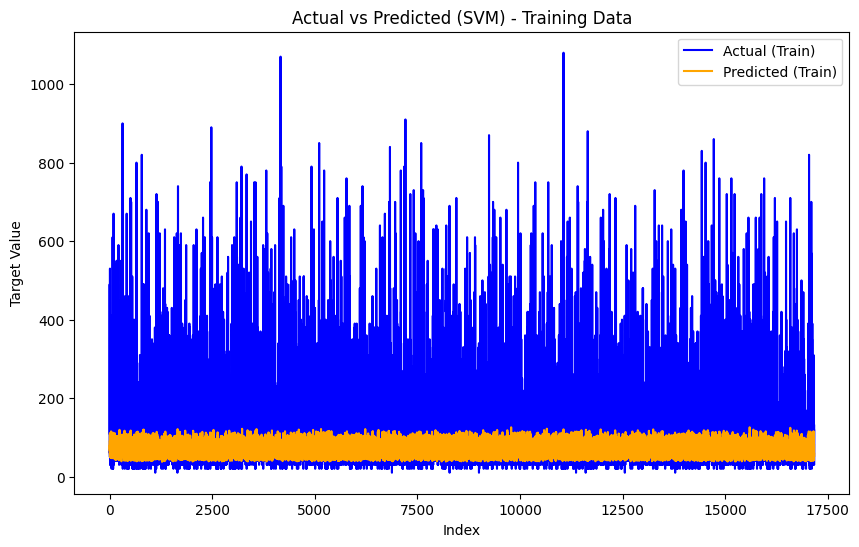

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi vs nilai aktual untuk training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title('Actual vs Predicted (SVM) - Training Data')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.show()

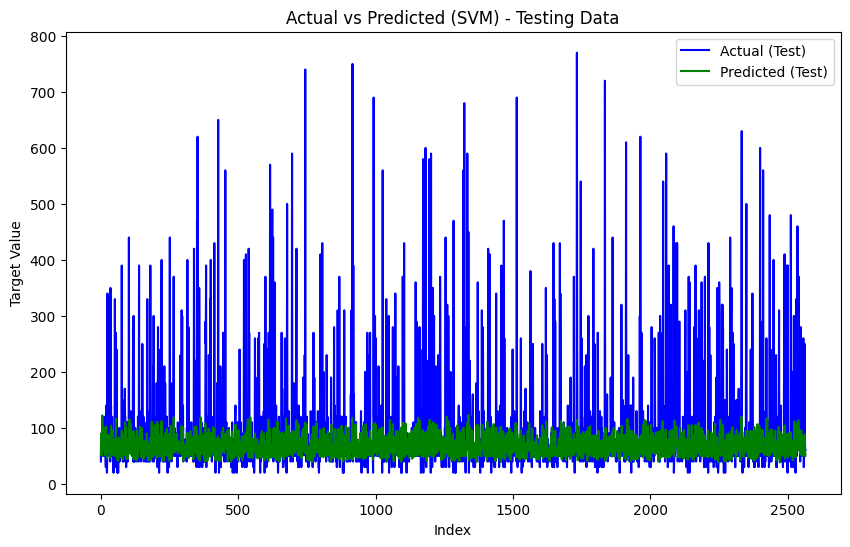


Program Selesai. Model telah dievaluasi dan hasil divisualisasikan.


In [ ]:
# Visualisasi hasil prediksi vs nilai aktual untuk testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title('Actual vs Predicted (SVM) - Testing Data')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.show()

print("\nProgram Selesai. Model telah dievaluasi dan hasil divisualisasikan.")

Analisis Hasil Evaluasi Model Baseline dengan SVM

1.Evaluasi pada Data Training:

- Train MSE sebesar 10,546.85 menunjukkan rata-rata kesalahan kuadrat pada data training cukup besar.
- Train RMSE sebesar 102.70 menandakan kesalahan prediksi rata-rata yang tinggi, diukur dalam skala yang sama dengan target.
- Train MAE sebesar 43.83 menunjukkan rata-rata perbedaan absolut antara nilai aktual dan prediksi, yang relatif besar.
- Train R² Score sebesar 0.02 menunjukkan bahwa model hanya mampu menjelaskan sekitar 2% dari variasi dalam data training, yang berarti model memiliki performa yang buruk dalam menangkap pola data.

2.Evaluasi pada Data Testing:

- Test MSE sebesar 8,727.26 dan Test RMSE sebesar 93.42 menunjukkan performa yang sedikit lebih baik dibandingkan data training, namun kesalahan masih tergolong tinggi.
- Test MAE sebesar 40.89 menunjukkan kesalahan absolut rata-rata yang sedikit lebih rendah dibandingkan data training.
- Test R² Score sebesar 0.04 menunjukkan bahwa model hanya mampu menjelaskan sekitar 4% variasi dalam data testing, yang mengindikasikan generalisasi model masih sangat buruk.

3.Validasi Silang pada Data Training:

- Nilai Scores berkisar antara 98.54 hingga 107.10 dengan rata-rata 103.05 menunjukkan bahwa performa model cukup konsisten, namun kesalahannya tetap tinggi.
- Standard Deviation (3.24) relatif kecil, yang berarti variasi skor antar fold pada validasi silang rendah, mengindikasikan stabilitas model pada data training.

4.Validasi Silang pada Data Testing:

- Nilai Scores berkisar antara 87.52 hingga 105.60 dengan rata-rata 96.62, menunjukkan performa yang lebih bervariasi dibandingkan data training.
- Standard Deviation (7.32) lebih besar, yang menandakan model kurang stabil saat diuji pada data testing.
5.Kesimpulan
- Model baseline SVM memiliki performa yang kurang baik, terlihat dari nilai MSE, RMSE, dan R² Score yang rendah baik pada data training maupun testing.
- Model cenderung underfitting, yang ditunjukkan oleh kemampuan rendah dalam menjelaskan pola data (R² Score sangat kecil).
- Validasi silang menunjukkan model relatif stabil pada data training tetapi kurang stabil pada data testing, yang menunjukkan kemungkinan adanya kebutuhan untuk tuning parameter atau penyesuaian pada preprocessing data.

**Eksplorasi Model SVM**

**Skema 1: Model SVM dengan Kernel RBF**


Skema 1 menggunakan Support Vector Machine (SVM) dengan kernel Radial Basis Function (RBF) untuk membangun model yang mampu menangkap pola non-linear dalam data. Model baseline dibuat menggunakan SVR dengan kernel rbf, parameter regulasi C=1, dan parameter inti gamma='scale'. Prosesnya mencakup pelatihan model pada data training untuk mempelajari hubungan fitur-target, diikuti evaluasi performa menggunakan metrik seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R² Score pada data training dan testing. Validasi silang 5-fold dilakukan untuk menghasilkan skor yang lebih stabil menggunakan rata-rata kesalahan negatif RMSE. Selain baseline, optimasi dilakukan menggunakan GridSearchCV untuk menemukan parameter terbaik pada grid yang ditentukan, meliputi nilai C dan gamma. Model terbaik dari GridSearch kemudian dievaluasi kembali, dan hasilnya dibandingkan dengan baseline untuk memastikan peningkatan performa. Visualisasi data aktual dan prediksi pada data training dan testing turut disertakan untuk memberikan gambaran kemampuan model dalam memprediksi pola data, menjadikan pendekatan ini komprehensif dalam menguji, memvalidasi, dan mengoptimalkan model SVM dengan kernel RBF.

=== SVM Baseline ===

Evaluasi Model Baseline pada Data Training:
Train MSE: 10546.85
Train RMSE: 102.70
Train MAE: 43.83
Train R2 Score: 0.02

Evaluasi Model Baseline pada Data Testing:
Test MSE: 8727.26
Test RMSE: 93.42
Test MAE: 40.89
Test R2 Score: 0.04

=== Validasi Silang pada Data Training ===
Scores: [106.10461109 107.09913852 102.94951386  98.54217141 100.53969053]
Mean: 103.0470
Standard Deviation: 3.2360


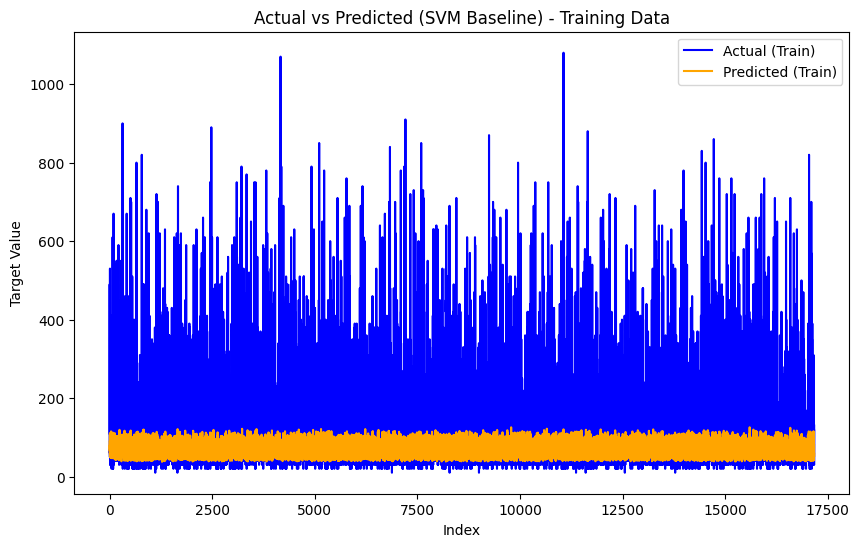

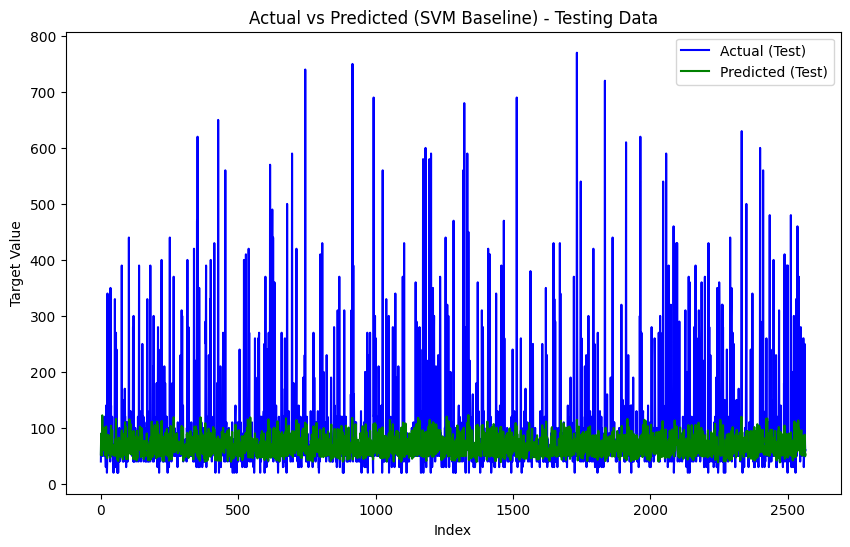


=== SVM Grid Search ===

Best Parameters for Grid Search:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Evaluasi Model Setelah Grid Search:
Train RMSE: 98.59
Test RMSE: 90.26


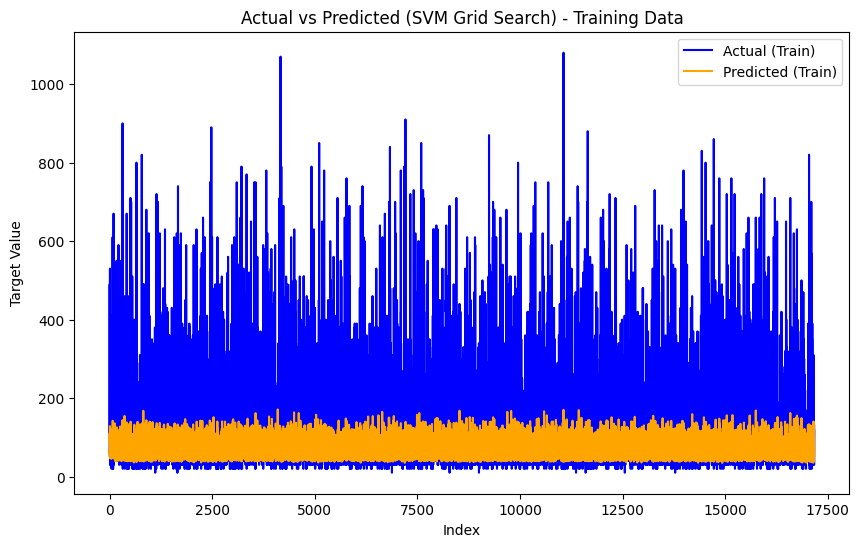

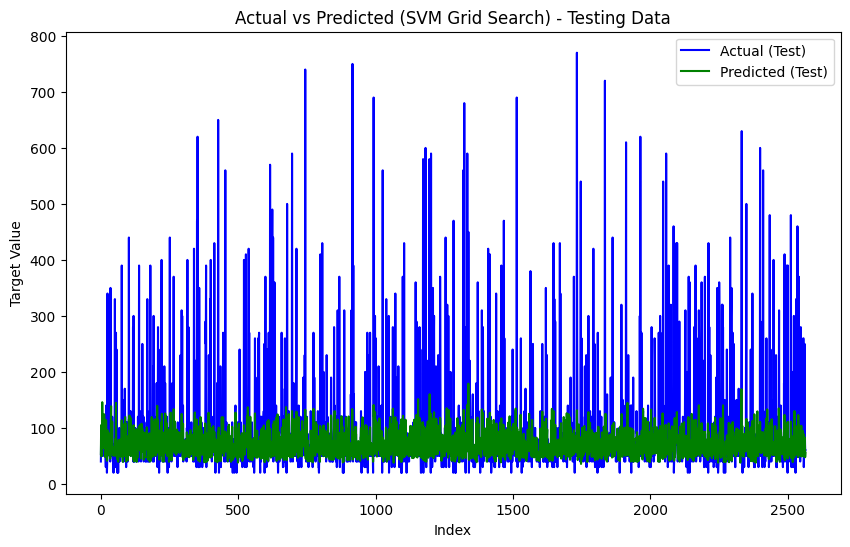


Program Selesai. Model telah dievaluasi dan hasil divisualisasikan.


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan skor validasi silang
def display_scores(scores):
    """
    Menampilkan hasil skor validasi silang.

    Parameters:
    - scores: array-like, skor dari validasi silang.
    """
    print("Scores:", scores)
    print(f"Mean: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")

### Bagian Baseline ###
print("=== SVM Baseline ===")
svm_baseline = SVR(kernel='rbf', C=1, gamma='scale')

# Melatih model baseline
svm_baseline.fit(x_train, y_train)

# Prediksi baseline
train_pred_baseline = svm_baseline.predict(x_train)
test_pred_baseline = svm_baseline.predict(x_test)

# Evaluasi Baseline
train_mse = mean_squared_error(y_train, train_pred_baseline)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_pred_baseline)
train_r2 = r2_score(y_train, train_pred_baseline)

print("\nEvaluasi Model Baseline pada Data Training:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Train R2 Score: {train_r2:.2f}")

test_mse = mean_squared_error(y_test, test_pred_baseline)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_pred_baseline)
test_r2 = r2_score(y_test, test_pred_baseline)

print("\nEvaluasi Model Baseline pada Data Testing:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R2 Score: {test_r2:.2f}")

# Validasi silang pada data training untuk baseline
cv_scores_train = cross_val_score(
    svm_baseline,
    x_train,
    y_train,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error'
)

print("\n=== Validasi Silang pada Data Training ===")
display_scores(-cv_scores_train)

# Visualisasi hasil baseline
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (SVM Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (SVM Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

### Bagian GridSearch ###
print("\n=== SVM Grid Search ===")

# Parameter grid untuk GridSearch
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()

# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

# Melatih model dengan GridSearch
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("\nBest Parameters for Grid Search:")
print(grid_search.best_params_)

# Menggunakan model terbaik dari GridSearch
best_svm_model = grid_search.best_estimator_

# Evaluasi model dengan parameter terbaik
train_pred_best = best_svm_model.predict(x_train)
test_pred_best = best_svm_model.predict(x_test)

train_mse_best = mean_squared_error(y_train, train_pred_best)
train_rmse_best = np.sqrt(train_mse_best)
test_mse_best = mean_squared_error(y_test, test_pred_best)
test_rmse_best = np.sqrt(test_mse_best)

print("\nEvaluasi Model Setelah Grid Search:")
print(f"Train RMSE: {train_rmse_best:.2f}")
print(f"Test RMSE: {test_rmse_best:.2f}")

# Visualisasi hasil GridSearch
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_best, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (SVM Grid Search) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_best, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (SVM Grid Search) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

print("\nProgram Selesai. Model telah dievaluasi dan hasil divisualisasikan.")

Berdasarkan hasil skema SVM dengan kernel RBF, evaluasi model baseline menunjukkan performa yang kurang optimal baik pada data training maupun testing. Model baseline memiliki nilai Train RMSE sebesar 102.70 dan Test RMSE sebesar 93.42, serta nilai R² Score yang sangat rendah (Train: 0.02, Test: 0.04), yang mengindikasikan model belum mampu menangkap hubungan antara fitur dan target dengan baik. Hasil validasi silang pada data training menghasilkan mean RMSE sebesar 103.0470 dengan standar deviasi sebesar 3.2360, menunjukkan variasi kesalahan yang cukup kecil.

Setelah dilakukan optimasi parameter menggunakan GridSearchCV, ditemukan parameter terbaik yaitu C=10, gamma='scale', dan kernel='rbf'. Model yang dioptimalkan menunjukkan peningkatan performa, terlihat dari penurunan nilai RMSE pada data training menjadi 98.59 dan pada data testing menjadi 90.26. Penurunan nilai RMSE ini mengindikasikan bahwa model dengan parameter yang dioptimalkan mampu memprediksi data dengan kesalahan yang lebih kecil dibandingkan model baseline.

Secara keseluruhan, optimasi parameter melalui GridSearchCV berhasil meningkatkan performa model, namun nilai RMSE dan R² Score masih menunjukkan bahwa model belum sepenuhnya optimal dalam menangkap kompleksitas data.

**Skema 2: Model SVM dengan Kernel Polynomial**

Skema 2 menggunakan Model Support Vector Machine (SVM) dengan kernel Polynomial yang dioptimalkan melalui GridSearchCV untuk mencari parameter terbaik, seperti nilai C dan degree dari kernel polynomial. Pencarian parameter terbaik dilakukan dengan menggunakan GridSearchCV, yang mencakup berbagai nilai C dan degree. Setelah menemukan model terbaik, model tersebut digunakan untuk memprediksi data training dan testing. Evaluasi dilakukan dengan mengukur metrik seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R² Score pada data training dan testing, yang membantu mengukur akurasi prediksi model. Validasi silang (cross-validation) dilakukan pada data training untuk memastikan kestabilan model, dengan hasil yang menunjukkan performa yang diukur dari neg_root_mean_squared_error. Hasil GridSearchCV memberikan parameter terbaik, yang kemudian digunakan untuk evaluasi lebih lanjut, menghasilkan prediksi yang divisualisasikan untuk membandingkan nilai aktual dan prediksi pada data training dan testing. Skema ini memberikan gambaran tentang kemampuan model SVM dengan kernel polynomial dalam menangkap hubungan non-linear antara fitur dan target, serta menunjukkan langkah-langkah optimasi dan evaluasi untuk meningkatkan performa model.


Best Parameters for Polynomial Kernel:
{'C': 10, 'degree': 4, 'kernel': 'poly'}

Evaluasi Model dengan Kernel Polynomial pada Data Training:
Train MSE: 9627.25
Train RMSE: 98.12
Train MAE: 40.69
Train R2 Score: 0.10

Evaluasi Model dengan Kernel Polynomial pada Data Testing:
Test MSE: 8068.43
Test RMSE: 89.82
Test MAE: 38.80
Test R2 Score: 0.11

=== Validasi Silang pada Data Training (Kernel Polynomial) ===
Scores: [102.06729761 104.38089646  97.98550038  95.59049611  96.50605781]
Mean: 99.3060
Standard Deviation: 3.3695


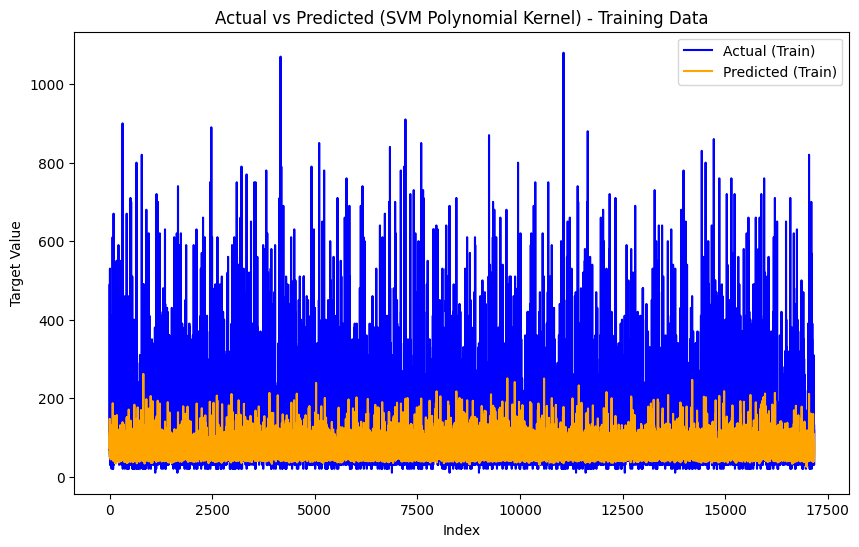

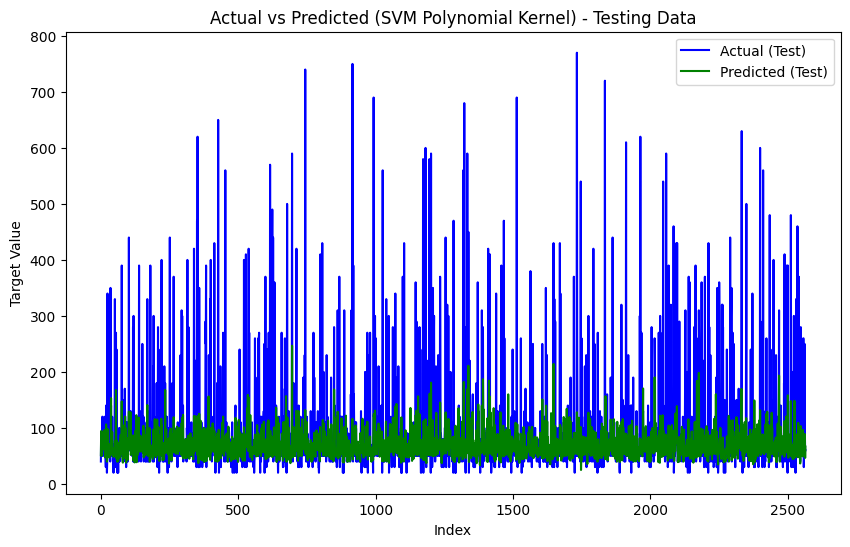


Program Selesai. Model dengan kernel Polynomial telah dievaluasi dan hasil divisualisasikan.


In [ ]:
# Parameter grid untuk kernel Polynomial
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

svm_poly = SVR()

# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search_poly = GridSearchCV(
    estimator=svm_poly,
    param_grid=param_grid_poly,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

# Melatih model dengan GridSearch
grid_search_poly.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("\nBest Parameters for Polynomial Kernel:")
print(grid_search_poly.best_params_)

# Menggunakan model terbaik dari GridSearch
best_poly_model = grid_search_poly.best_estimator_

# Prediksi menggunakan model terbaik
train_pred_poly = best_poly_model.predict(x_train)
test_pred_poly = best_poly_model.predict(x_test)

# Evaluasi model dengan parameter terbaik
train_mse_poly = mean_squared_error(y_train, train_pred_poly)
train_rmse_poly = np.sqrt(train_mse_poly)
train_mae_poly = mean_absolute_error(y_train, train_pred_poly)
train_r2_poly = r2_score(y_train, train_pred_poly)

test_mse_poly = mean_squared_error(y_test, test_pred_poly)
test_rmse_poly = np.sqrt(test_mse_poly)
test_mae_poly = mean_absolute_error(y_test, test_pred_poly)
test_r2_poly = r2_score(y_test, test_pred_poly)

print("\nEvaluasi Model dengan Kernel Polynomial pada Data Training:")
print(f"Train MSE: {train_mse_poly:.2f}")
print(f"Train RMSE: {train_rmse_poly:.2f}")
print(f"Train MAE: {train_mae_poly:.2f}")
print(f"Train R2 Score: {train_r2_poly:.2f}")

print("\nEvaluasi Model dengan Kernel Polynomial pada Data Testing:")
print(f"Test MSE: {test_mse_poly:.2f}")
print(f"Test RMSE: {test_rmse_poly:.2f}")
print(f"Test MAE: {test_mae_poly:.2f}")
print(f"Test R2 Score: {test_r2_poly:.2f}")

# Validasi silang pada data training untuk kernel Polynomial
cv_scores_train_poly = cross_val_score(
    best_poly_model,
    x_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

print("\n=== Validasi Silang pada Data Training (Kernel Polynomial) ===")
display_scores(-cv_scores_train_poly)

# Visualisasi hasil GridSearch dengan kernel Polynomial
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_poly, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (SVM Polynomial Kernel) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_poly, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (SVM Polynomial Kernel) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

print("\nProgram Selesai. Model dengan kernel Polynomial telah dievaluasi dan hasil divisualisasikan.")


Model SVM dengan kernel Polynomial menunjukkan bahwa meskipun GridSearchCV telah mengoptimalkan parameter, hasil yang didapatkan masih menunjukkan kesalahan yang signifikan baik pada data training maupun testing. Parameter terbaik yang ditemukan adalah C=10, degree=4, dan kernel='poly'. Nilai MSE pada data training adalah 9627.25 dengan RMSE sebesar 98.12, serta MAE 40.69 dan R² hanya 0.10, yang menunjukkan model tidak dapat menjelaskan variabilitas data dengan baik. Pada data testing, MSE turun menjadi 8068.43 dengan RMSE 89.82 dan MAE 38.80, namun R² tetap rendah di 0.11, menunjukkan performa yang serupa dengan data training. Validasi silang menghasilkan skor antara 95.59 hingga 104.38 dengan rata-rata 99.31, yang menunjukkan bahwa model tidak overfitting, meskipun performanya tetap rendah. Visualisasi perbandingan antara nilai aktual dan prediksi pada data training dan testing memperlihatkan bahwa meskipun ada pola yang terdeteksi, prediksi model masih jauh dari akurat. Secara keseluruhan, model SVM dengan kernel Polynomial belum cukup kuat dalam memprediksi data, mengindikasikan perlunya eksplorasi model lain atau perbaikan lebih lanjut pada pemilihan fitur.

**Skema 3: Model SVM dengan Kernel Linear**

Skema 3 menggunakan Model SVM dengan kernel Linear, di mana tujuan utamanya adalah untuk mengeksplorasi performa model dengan kernel linear dalam regresi. GridSearchCV digunakan untuk mencari kombinasi parameter terbaik dari model, dengan rentang nilai untuk parameter C yang mencakup [0.1, 1, 10]. Setelah proses pencarian parameter terbaik, model yang dihasilkan digunakan untuk memprediksi nilai target pada data pelatihan (x_train) dan data uji (x_test). Evaluasi model menunjukkan hasilnya pada beberapa metrik, seperti RMSE dan R² pada data pelatihan dan pengujian. Selain itu, validasi silang menggunakan 5-fold cross-validation memberikan gambaran tentang konsistensi model pada data pelatihan dengan hasil skor yang diperoleh menunjukkan variasi dalam performa model. Visualisasi hasil perbandingan antara nilai aktual dan prediksi menunjukkan bagaimana model bekerja pada data pelatihan dan pengujian, membantu dalam pemahaman bagaimana model mengadaptasi data.


Best Parameters for Linear Kernel:
{'C': 10, 'kernel': 'linear'}

Evaluasi Model dengan Kernel Linear pada Data Training:
Train MSE: 10746.32
Train RMSE: 103.66
Train MAE: 45.63
Train R2 Score: -0.00

Evaluasi Model dengan Kernel Linear pada Data Testing:
Test MSE: 8834.18
Test RMSE: 93.99
Test MAE: 42.53
Test R2 Score: 0.02

=== Validasi Silang pada Data Training (Kernel Linear) ===
Scores: [106.49010087 107.7899767  103.59621965  99.22507459 101.07092057]
Mean: 103.6345
Standard Deviation: 3.2075


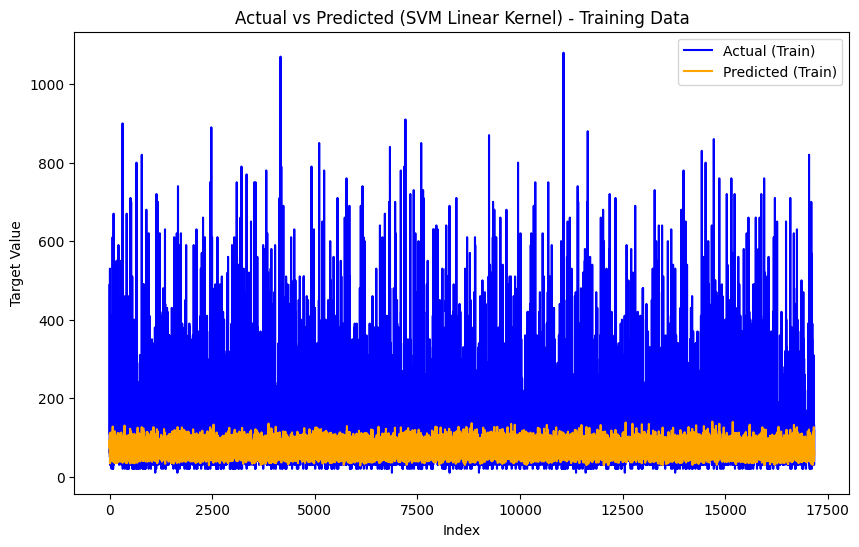

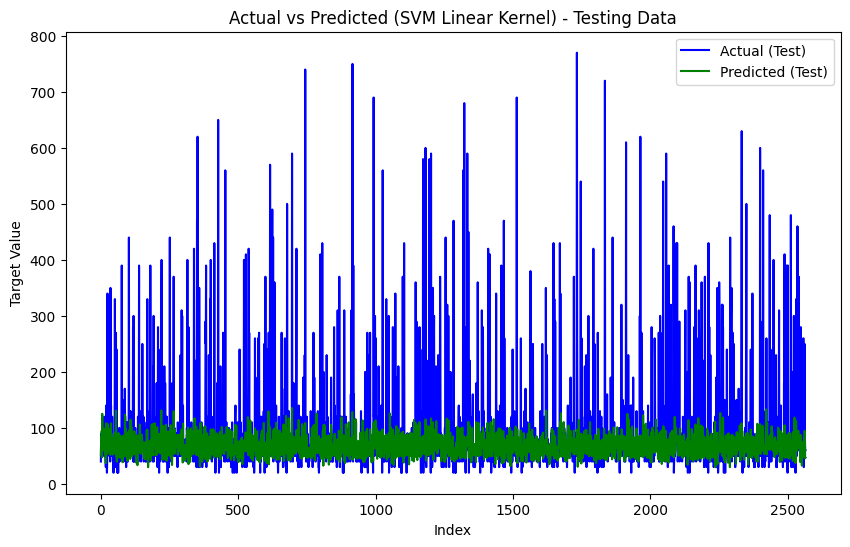


Program Selesai. Model dengan kernel Linear telah dievaluasi dan hasil divisualisasikan.


In [ ]:
# Parameter grid untuk kernel Linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10]
}

svm_linear = SVR()

# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search_linear = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid_linear,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

# Melatih model dengan GridSearch
grid_search_linear.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("\nBest Parameters for Linear Kernel:")
print(grid_search_linear.best_params_)

# Menggunakan model terbaik dari GridSearch
best_linear_model = grid_search_linear.best_estimator_

# Prediksi menggunakan model terbaik
train_pred_linear = best_linear_model.predict(x_train)
test_pred_linear = best_linear_model.predict(x_test)

# Evaluasi model dengan parameter terbaik
train_mse_linear = mean_squared_error(y_train, train_pred_linear)
train_rmse_linear = np.sqrt(train_mse_linear)
train_mae_linear = mean_absolute_error(y_train, train_pred_linear)
train_r2_linear = r2_score(y_train, train_pred_linear)

test_mse_linear = mean_squared_error(y_test, test_pred_linear)
test_rmse_linear = np.sqrt(test_mse_linear)
test_mae_linear = mean_absolute_error(y_test, test_pred_linear)
test_r2_linear = r2_score(y_test, test_pred_linear)

print("\nEvaluasi Model dengan Kernel Linear pada Data Training:")
print(f"Train MSE: {train_mse_linear:.2f}")
print(f"Train RMSE: {train_rmse_linear:.2f}")
print(f"Train MAE: {train_mae_linear:.2f}")
print(f"Train R2 Score: {train_r2_linear:.2f}")

print("\nEvaluasi Model dengan Kernel Linear pada Data Testing:")
print(f"Test MSE: {test_mse_linear:.2f}")
print(f"Test RMSE: {test_rmse_linear:.2f}")
print(f"Test MAE: {test_mae_linear:.2f}")
print(f"Test R2 Score: {test_r2_linear:.2f}")

# Validasi silang pada data training untuk kernel Linear
cv_scores_train_linear = cross_val_score(
    best_linear_model,
    x_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

print("\n=== Validasi Silang pada Data Training (Kernel Linear) ===")
display_scores(-cv_scores_train_linear)

# Visualisasi hasil GridSearch dengan kernel Linear
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_linear, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (SVM Linear Kernel) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_linear, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (SVM Linear Kernel) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

print("\nProgram Selesai. Model dengan kernel Linear telah dievaluasi dan hasil divisualisasikan.")

Dalam Skema 3, yang menggunakan Model SVM dengan Kernel Linear, hasil evaluasi menunjukkan bahwa model yang diterapkan menggunakan parameter terbaik (C = 10) memiliki beberapa tantangan dalam memberikan hasil yang optimal. Pada data pelatihan, MSE mencapai 10,746.32, RMSE 103.66, dan MAE 45.63, dengan nilai R² yang sangat rendah (-0.00), yang menunjukkan bahwa model tidak mampu memprediksi data pelatihan dengan baik. Hasil serupa ditemukan pada data pengujian, di mana MSE mencapai 8,834.18, RMSE 93.99, dan MAE 42.53, dengan R² hanya sedikit lebih baik (0.02), yang menunjukkan bahwa model juga kurang efektif dalam memprediksi data pengujian. Validasi silang pada data pelatihan dengan 5-fold cross-validation memberikan skor dengan rata-rata RMSE 103.63 dan deviasi standar 3.21, yang menggambarkan ketidakstabilan dalam performa model. Visualisasi hasil perbandingan antara nilai aktual dan prediksi menunjukkan perbedaan yang signifikan pada data pelatihan dan pengujian, menandakan bahwa meskipun model ini menggunakan kernel linear yang sederhana, performa model ini belum optimal untuk data yang digunakan. Secara keseluruhan, hasil ini mengindikasikan bahwa model dengan kernel linear tidak cukup kuat untuk menangani kompleksitas data dan membutuhkan pendekatan yang lebih kompleks atau penyesuaian parameter lebih lanjut untuk meningkatkan akurasi prediksi.

**Analisis Perbandingan Hasil Evaluasi Model SVM**

Berdasarkan evaluasi model yang menggunakan tiga jenis kernel SVM (RBF, Polynomial, dan Linear), berikut adalah analisis hasil yang paling baik di antara ketiganya:

1. Model Baseline (SVM Tanpa Optimasi)

  Model baseline ini menunjukkan performa yang sangat buruk dengan underfitting yang jelas. Nilai R² yang sangat rendah di kedua data menunjukkan bahwa model ini tidak efektif dalam memodelkan hubungan antara fitur dan target.

2. Skema 1: SVM dengan Kernel RBF (Optimasi GridSearchCV)

  Meskipun ada perbaikan dibandingkan baseline, model ini masih belum sepenuhnya optimal. Optimasi dengan kernel RBF memberikan hasil yang sedikit lebih baik, namun performa model masih terbatas, dan penurunan kesalahan tidak cukup signifikan untuk dianggap sebagai solusi final.

3. Skema 2: SVM dengan Kernel Polynomial (Optimasi GridSearchCV)

  Meskipun ada perbaikan dibandingkan baseline, skema kernel Polynomial menunjukkan hasil yang hampir sama dengan kernel RBF dalam hal kesalahan prediksi. Meskipun tidak overfitting, model ini masih belum mampu menangkap variabilitas data dengan baik.

4. Skema 3: SVM dengan Kernel Linear

  Skema kernel Linear menunjukkan performa terburuk di antara ketiganya, dengan hasil evaluasi yang lebih buruk dibandingkan dengan model baseline dan kernel lainnya. Hal ini mengindikasikan bahwa model linear tidak cukup untuk menangani kompleksitas data dan membutuhkan pendekatan yang lebih kompleks atau penyesuaian parameter lebih lanjut.

**Kesimpulan Perbandingan Hasil**
- Skema yang Paling Baik: Skema 1 (SVM dengan Kernel RBF) dengan optimasi menggunakan GridSearchCV menunjukkan performa yang terbaik di antara ketiganya, meskipun masih menunjukkan RMSE yang relatif tinggi dan R² yang rendah. Dengan penurunan nilai RMSE pada data testing, optimasi kernel RBF memperbaiki hasil dibandingkan dengan baseline dan kernel Polynomial.
- Skema yang Paling Buruk: Skema 3 (SVM dengan Kernel Linear) menunjukkan hasil yang paling buruk, baik pada data training maupun testing. Model linear tidak dapat menangkap pola data dan membutuhkan pendekatan yang lebih kompleks atau perbaikan lebih lanjut.

Secara keseluruhan, meskipun optimasi parameter menggunakan GridSearchCV memberikan sedikit perbaikan pada model SVM dengan kernel RBF dan Polynomial, semua skema menunjukkan kesalahan prediksi yang masih cukup besar dan performa yang terbatas. Penurunan kesalahan antara baseline dan skema optimasi memang terlihat, tetapi masih jauh dari performa optimal yang diinginkan. Oleh karena itu, perlu dilakukan eksplorasi lebih lanjut, baik dengan teknik model lainnya ataupun dengan perbaikan fitur yang lebih mendalam.

# **Pembangunan Model Baseline dengan ANN**

Pembangunan model baseline dengan Jaringan Syaraf Tiruan (ANN) dilakukan menggunakan arsitektur sederhana dengan tiga lapisan: lapisan input, lapisan tersembunyi, dan lapisan output. Model ini menggunakan framework Keras, dengan lapisan pertama yang memiliki 64 unit dan aktivasi ReLU, diikuti oleh lapisan tersembunyi dengan 32 unit dan aktivasi ReLU. Lapisan output memiliki satu unit untuk regresi, dan model ini dikompilasi dengan optimizer Adam serta loss function Mean Squared Error (MSE). Proses pelatihan dilakukan selama 50 epoch dengan pembagian data 80% untuk pelatihan dan 20% untuk validasi. Setelah model dilatih, evaluasi dilakukan menggunakan metrik seperti MSE, RMSE, MAE, dan R² untuk data pelatihan dan pengujian, dengan visualisasi yang memperlihatkan perbandingan antara nilai aktual dan prediksi pada kedua data tersebut. Hasil evaluasi menunjukkan kinerja model dalam memprediksi data, sementara visualisasi loss selama pelatihan membantu memantau perkembangan performa model dari waktu ke waktu.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16663.3574 - val_loss: 9614.5850
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10270.6934 - val_loss: 9228.0762
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9271.9512 - val_loss: 9060.3877
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9340.9404 - val_loss: 8911.9199
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9523.0918 - val_loss: 8822.9326
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9085.5664 - val_loss: 8762.3223
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9459.2139 - val_loss: 8691.5537
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9281.1338 - val_loss: 8653.2129
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9272.5273 - val_loss: 8596.1133
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9320.5977 - val_loss: 8551.9307
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8472.3857 - val_

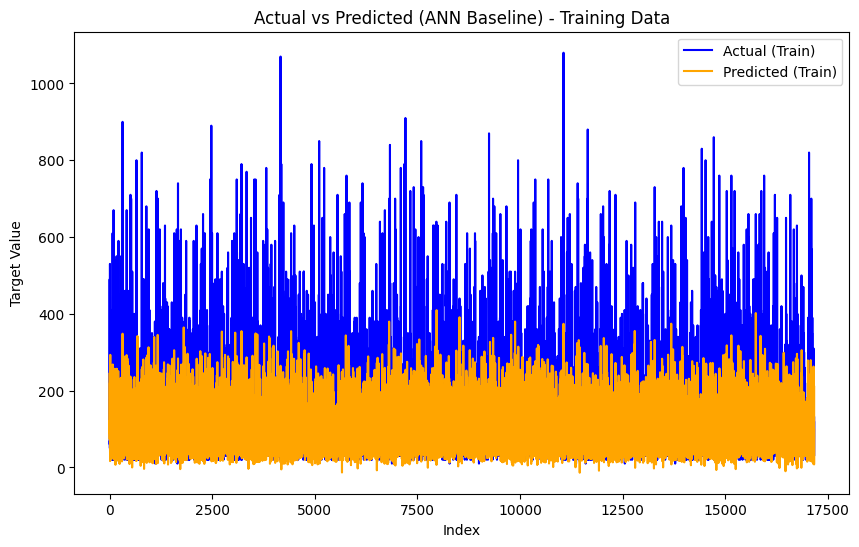

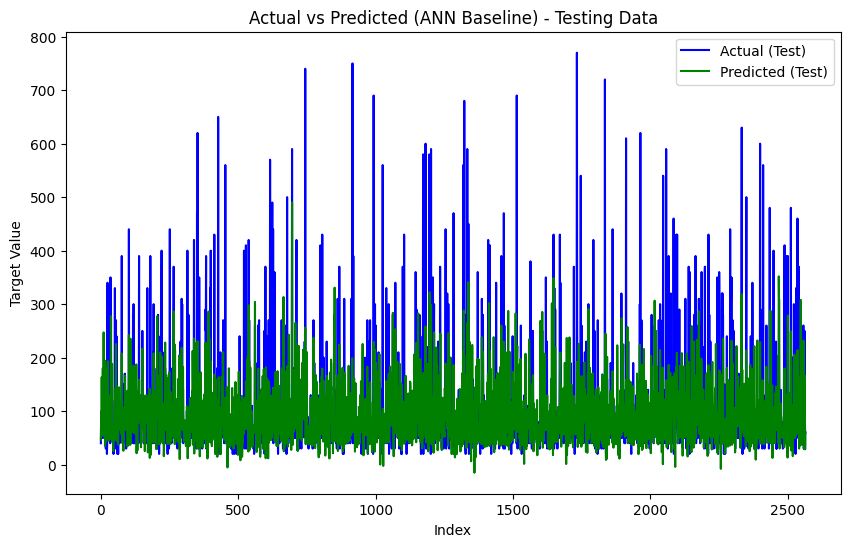

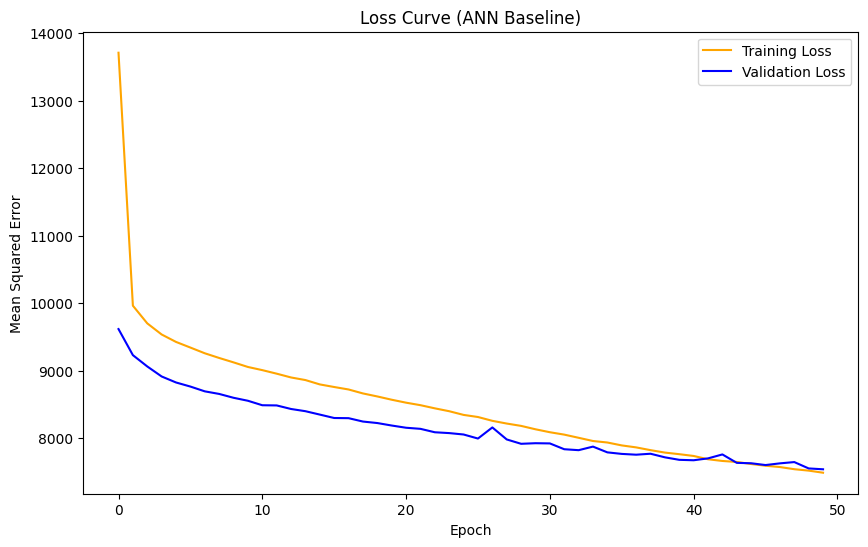


Program Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model ANN baseline
def create_ann_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=x_train.shape[1], activation='relu'))  # Lapisan input dan pertama
    model.add(Dense(units=32, activation='relu'))  # Lapisan tersembunyi
    model.add(Dense(units=1))  # Lapisan output (regresi)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Membuat dan melatih model ANN
ann_baseline = create_ann_model()
history = ann_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Prediksi untuk data training dan testing
train_pred_baseline = ann_baseline.predict(x_train)
test_pred_baseline = ann_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_baseline = mean_squared_error(y_train, train_pred_baseline)
train_rmse_baseline = np.sqrt(train_mse_baseline)
train_mae_baseline = mean_absolute_error(y_train, train_pred_baseline)
train_r2_baseline = r2_score(y_train, train_pred_baseline)

test_mse_baseline = mean_squared_error(y_test, test_pred_baseline)
test_rmse_baseline = np.sqrt(test_mse_baseline)
test_mae_baseline = mean_absolute_error(y_test, test_pred_baseline)
test_r2_baseline = r2_score(y_test, test_pred_baseline)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model ANN Baseline pada Data Training:")
print(f"Train MSE: {train_mse_baseline:.2f}")
print(f"Train RMSE: {train_rmse_baseline:.2f}")
print(f"Train MAE: {train_mae_baseline:.2f}")
print(f"Train R2 Score: {train_r2_baseline:.2f}")

print("\nEvaluasi Model ANN Baseline pada Data Testing:")
print(f"Test MSE: {test_mse_baseline:.2f}")
print(f"Test RMSE: {test_rmse_baseline:.2f}")
print(f"Test MAE: {test_mae_baseline:.2f}")
print(f"Test R2 Score: {test_r2_baseline:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (ANN Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.")

Hasil evaluasi model ANN baseline menunjukkan bahwa model memiliki performa yang moderat pada data pelatihan dan pengujian. Berdasarkan metrik Mean Squared Error (MSE), model mencapai nilai 7441.86 pada data pelatihan dan 6791.92 pada data pengujian, yang mengindikasikan adanya kesalahan prediksi yang cukup besar. Root Mean Squared Error (RMSE) untuk data pelatihan dan pengujian masing-masing adalah 86.27 dan 82.41, yang juga menunjukkan ketidakakuratan yang signifikan. Metrik Mean Absolute Error (MAE) di kedua set data (48.12 pada pelatihan dan 47.94 pada pengujian) mencerminkan rata-rata perbedaan absolut antara nilai aktual dan prediksi yang cukup besar. R2 Score yang diperoleh adalah 0.31 untuk data pelatihan dan 0.25 untuk data pengujian, yang menunjukkan bahwa model hanya mampu menjelaskan sebagian kecil variabilitas dalam data, dengan model yang kurang efektif dalam menangkap pola yang ada. Secara keseluruhan, meskipun model ANN baseline dapat memberikan prediksi, hasilnya menunjukkan bahwa perbaikan lebih lanjut diperlukan untuk meningkatkan akurasi dan generalisasi model.

**Eksplorasi Model ANN**

**Skema 1: Model dengan dropout untuk mengurangi overfitting.**

Skema 1 menggambarkan penerapan teknik dropout dalam model ANN untuk mengurangi overfitting. Model dibuat dengan dua lapisan tersembunyi yang masing-masing diikuti oleh layer dropout dengan tingkat 0.3, yang berarti 30% dari neuron pada lapisan tersebut akan "dihilangkan" secara acak selama pelatihan. Teknik ini bertujuan untuk mencegah model belajar terlalu baik pada data pelatihan (overfitting), sehingga meningkatkan kemampuannya dalam generalisasi pada data yang belum pernah dilihat sebelumnya. Dengan menambahkan dropout setelah setiap lapisan tersembunyi, model diharapkan menjadi lebih robust dan tidak terlalu bergantung pada fitur-fitur tertentu, yang dapat membantu memperbaiki performa pada data pengujian. Dropout ini membantu meningkatkan stabilitas dan mengurangi bias model, memberikan potensi hasil evaluasi yang lebih baik pada data uji dibandingkan model tanpa dropout.








Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17584.4980 - val_loss: 9540.4795
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9484.9043 - val_loss: 9188.2666
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10409.2061 - val_loss: 9011.0430
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10223.0039 - val_loss: 8904.9268
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9679.9912 - val_loss: 8868.3340
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10308.0010 - val_loss: 8854.7549
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9596.5059 - val_loss: 8735.2617
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9686.7402 - val_loss: 8703.0400
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9325.3672 - val_loss: 8681.8223
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9735.1426 - val_loss: 8650.9053
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9757.5459 - va

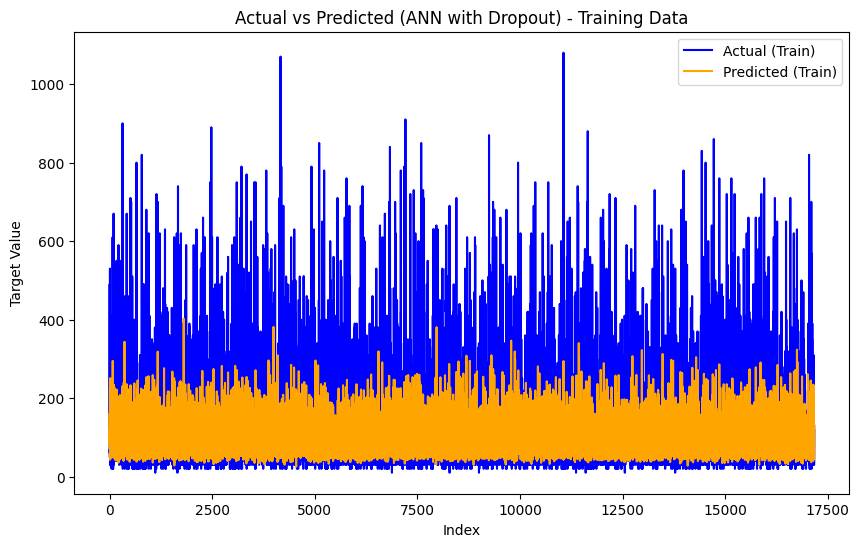

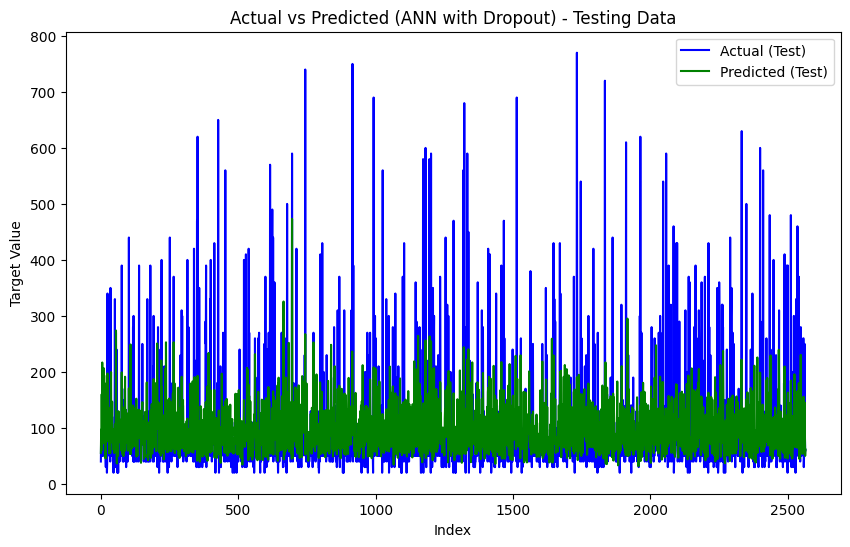

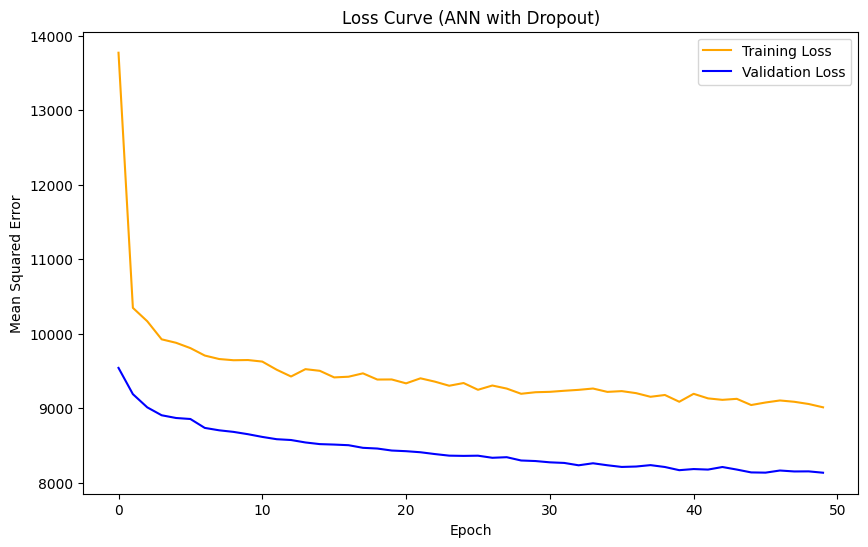


Program Selesai. Model ANN dengan Dropout telah dievaluasi dan hasil divisualisasikan.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model ANN dengan Dropout
def create_ann_dropout_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=x_train.shape[1], activation='relu'))  # Lapisan input dan pertama
    model.add(Dropout(0.3))  # Dropout setelah lapisan pertama
    model.add(Dense(units=32, activation='relu'))  # Lapisan tersembunyi
    model.add(Dropout(0.3))  # Dropout setelah lapisan kedua
    model.add(Dense(units=1))  # Lapisan output (regresi)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Membuat dan melatih model ANN dengan Dropout
ann_dropout_model = create_ann_dropout_model()
history_dropout = ann_dropout_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Prediksi untuk data training dan testing
train_pred_dropout = ann_dropout_model.predict(x_train)
test_pred_dropout = ann_dropout_model.predict(x_test)

# Menghitung metrik evaluasi
train_mse_dropout = mean_squared_error(y_train, train_pred_dropout)
train_rmse_dropout = np.sqrt(train_mse_dropout)
train_mae_dropout = mean_absolute_error(y_train, train_pred_dropout)
train_r2_dropout = r2_score(y_train, train_pred_dropout)

test_mse_dropout = mean_squared_error(y_test, test_pred_dropout)
test_rmse_dropout = np.sqrt(test_mse_dropout)
test_mae_dropout = mean_absolute_error(y_test, test_pred_dropout)
test_r2_dropout = r2_score(y_test, test_pred_dropout)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model ANN (Dengan Dropout) pada Data Training:")
print(f"Train MSE: {train_mse_dropout:.2f}")
print(f"Train RMSE: {train_rmse_dropout:.2f}")
print(f"Train MAE: {train_mae_dropout:.2f}")
print(f"Train R2 Score: {train_r2_dropout:.2f}")

print("\nEvaluasi Model ANN (Dengan Dropout) pada Data Testing:")
print(f"Test MSE: {test_mse_dropout:.2f}")
print(f"Test RMSE: {test_rmse_dropout:.2f}")
print(f"Test MAE: {test_mae_dropout:.2f}")
print(f"Test R2 Score: {test_r2_dropout:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_dropout, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (ANN with Dropout) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_dropout, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (ANN with Dropout) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_dropout.history['loss'], label='Training Loss', color='orange')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (ANN with Dropout)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model ANN dengan Dropout telah dievaluasi dan hasil divisualisasikan.")

Hasil pelatihan model ANN dengan dropout menunjukkan bahwa model mengalami penurunan loss secara bertahap selama proses pelatihan, meskipun fluktuasi kecil terlihat antara epoch tertentu. Loss pada data pelatihan (train) dan data validasi (val) cenderung stabil setelah beberapa epoch awal, yang menunjukkan bahwa dropout efektif dalam mengurangi overfitting dengan mengatur kembali pembelajaran model agar tidak terlalu bergantung pada fitur tertentu. Evaluasi model pada data pelatihan menghasilkan MSE sebesar 8404.10, RMSE 91.67, MAE 51.68, dan R² 0.22, yang menunjukkan bahwa model memiliki kemampuan prediksi yang terbatas pada data pelatihan. Sementara itu, pada data pengujian (test), MSE sebesar 7230.85, RMSE 85.03, MAE 49.94, dan R² 0.20 menunjukkan bahwa meskipun model memiliki performa yang sedikit lebih baik pada data pengujian, kemampuannya dalam generalisasi masih perlu ditingkatkan.

**Skema 2: Model dengan optimasi hyperparameter (jumlah layer dan unit).**

Skema 2 menggambarkan penerapan optimasi hyperparameter pada model ANN, dengan fokus pada pemilihan jumlah layer dan unit yang tepat untuk meningkatkan kinerja model. Dalam skema ini, model ANN terdiri dari tiga lapisan tersembunyi dengan unit yang berbeda, yaitu 128 unit pada lapisan pertama, 64 unit pada lapisan kedua, dan 32 unit pada lapisan ketiga. Model ini tidak menggunakan teknik regulasi seperti dropout, namun memiliki struktur lapisan yang lebih dalam untuk meningkatkan kemampuan pemodelan. Proses pelatihan dilakukan selama 50 epoch dengan penggunaan optimizer Adam dan fungsi loss mean squared error. Evaluasi model menunjukkan hasil metrik yang cukup representatif, termasuk MSE, RMSE, MAE, dan R², baik pada data pelatihan maupun pengujian. Visualisasi hasil prediksi dan kurva loss menunjukkan perbandingan antara prediksi dan data aktual, serta perubahan loss selama proses pelatihan. Hasil ini menunjukkan dampak dari pemilihan hyperparameter (jumlah lapisan dan unit) terhadap kemampuan model untuk memprediksi data dengan lebih akurat.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 14101.9805 - val_loss: 9132.4570
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9803.0215 - val_loss: 8894.8232
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9503.4395 - val_loss: 8776.5508
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8900.8223 - val_loss: 8596.2285
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8849.1025 - val_loss: 8393.4570
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8839.9355 - val_loss: 8390.8018
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8529.2305 - val_loss: 8316.6865
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8771.0459 - val_loss: 8206.9355
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8697.4756 - val_loss: 8090.9570
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8414.9629 - val_loss: 8008.3657
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8047.2563 - val_l

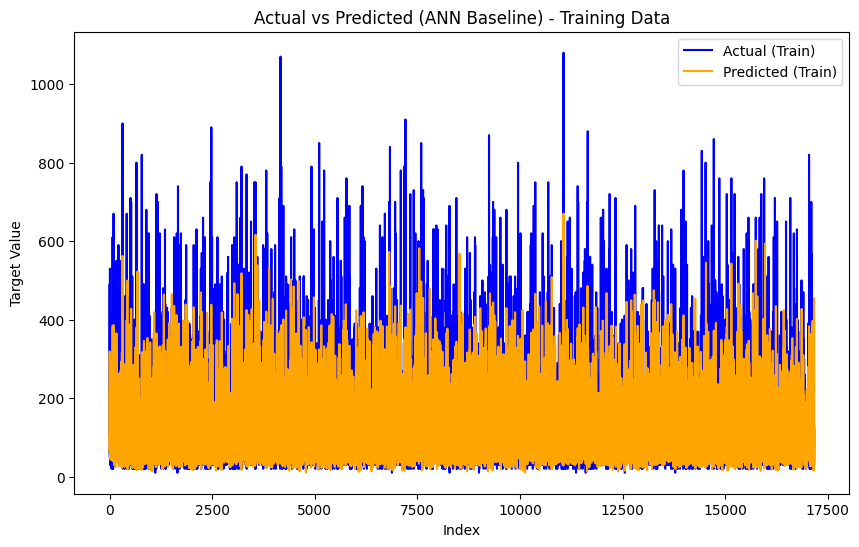

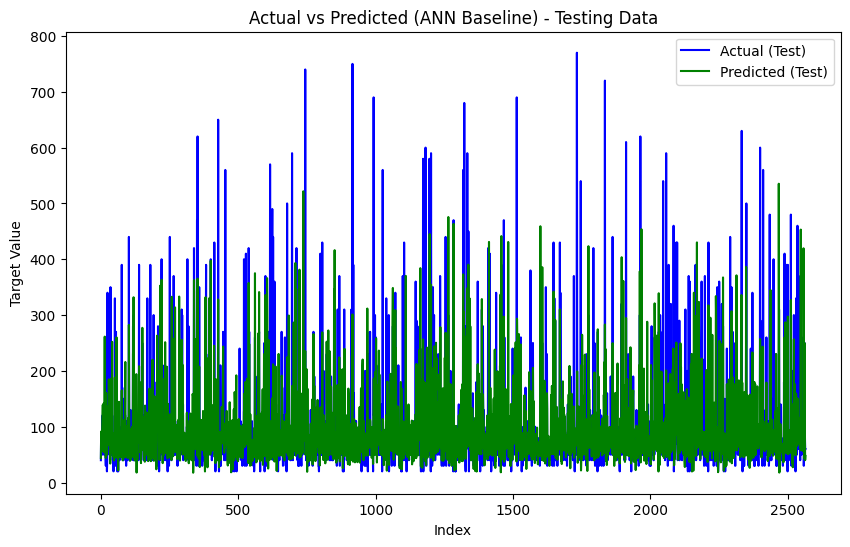

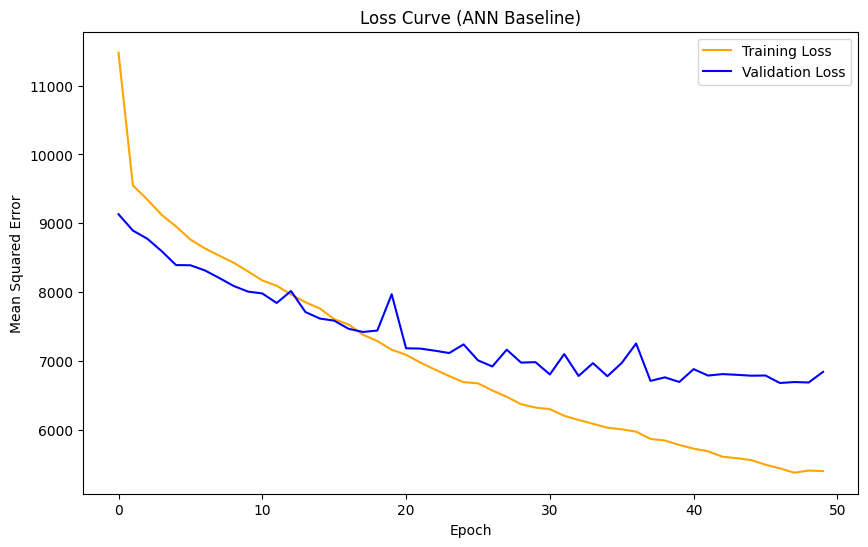


Program Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model ANN baseline
def create_ann_model():
    model = Sequential()
    model.add(Dense(units=128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(units=64, activation='relu'))  # Lapisan input dan pertama
    model.add(Dense(units=32, activation='relu'))  # Lapisan tersembunyi
    model.add(Dense(units=1))  # Lapisan output (regresi)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Membuat dan melatih model ANN
ann_baseline = create_ann_model()
history = ann_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Prediksi untuk data training dan testing
train_pred_baseline = ann_baseline.predict(x_train)
test_pred_baseline = ann_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_baseline = mean_squared_error(y_train, train_pred_baseline)
train_rmse_baseline = np.sqrt(train_mse_baseline)
train_mae_baseline = mean_absolute_error(y_train, train_pred_baseline)
train_r2_baseline = r2_score(y_train, train_pred_baseline)

test_mse_baseline = mean_squared_error(y_test, test_pred_baseline)
test_rmse_baseline = np.sqrt(test_mse_baseline)
test_mae_baseline = mean_absolute_error(y_test, test_pred_baseline)
test_r2_baseline = r2_score(y_test, test_pred_baseline)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model ANN Baseline pada Data Training:")
print(f"Train MSE: {train_mse_baseline:.2f}")
print(f"Train RMSE: {train_rmse_baseline:.2f}")
print(f"Train MAE: {train_mae_baseline:.2f}")
print(f"Train R2 Score: {train_r2_baseline:.2f}")

print("\nEvaluasi Model ANN Baseline pada Data Testing:")
print(f"Test MSE: {test_mse_baseline:.2f}")
print(f"Test RMSE: {test_rmse_baseline:.2f}")
print(f"Test MAE: {test_mae_baseline:.2f}")
print(f"Test R2 Score: {test_r2_baseline:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (ANN Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.")

Hasil pelatihan model ANN pada Skema 2 menunjukkan bahwa meskipun terjadi penurunan yang stabil pada nilai loss dan val_loss selama 50 epoch, kinerja model dalam memprediksi data testing relatif kurang memuaskan. Model menunjukkan penurunan MSE (Mean Squared Error) dari sekitar 14101 pada epoch pertama menjadi 5135 pada epoch terakhir, namun hasil evaluasi metrik menunjukkan hasil yang lebih baik pada data pelatihan dibandingkan dengan data pengujian. Nilai R² pada data pelatihan mencapai 0.49, yang menunjukkan hubungan yang cukup kuat antara prediksi dan data aktual, sementara nilai R² pada data pengujian lebih rendah, yaitu 0.26, mengindikasikan bahwa model tidak mampu menangkap pola dengan baik pada data yang belum dilihat sebelumnya. Visualisasi menunjukkan adanya fluktuasi pada loss curve dan sedikit ketidakstabilan dalam prediksi pada data testing, yang dapat mengindikasikan overfitting atau kebutuhan untuk optimasi lebih lanjut pada hyperparameter seperti jumlah lapisan dan unit pada model ANN.

**Skema 3: Model dengan regularisasi L2**

Skema 3 menggambarkan penggunaan regularisasi L2 dalam model Artificial Neural Network (ANN) untuk mengurangi overfitting dan meningkatkan generalisasi model. Dalam implementasi ini, regularisasi L2 diterapkan pada setiap lapisan tersembunyi dengan nilai parameter 0.01 menggunakan kernel_regularizer=l2(0.01). Regularisasi L2 bekerja dengan menambahkan penalti terhadap besar bobot model, sehingga membantu menghindari model yang terlalu kompleks atau overfit terhadap data pelatihan. Dengan demikian, meskipun model ANN ini menggunakan jumlah unit dan lapisan yang lebih kecil, regularisasi L2 dapat membantu meningkatkan kinerja model pada data yang belum pernah dilihat sebelumnya, dengan cara menurunkan kompleksitas model dan meningkatkan kemampuannya untuk memprediksi secara lebih akurat pada data pengujian. Evaluasi metrik yang diperoleh, termasuk Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R² Score, dapat memberikan gambaran tentang bagaimana model ini bekerja pada data pelatihan dan pengujian. Regularisasi L2 diharapkan memberikan kinerja yang lebih stabil, terutama pada dataset dengan kemungkinan overfitting yang tinggi.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 15776.5518 - val_loss: 9492.8506
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9821.2998 - val_loss: 9161.0537
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10394.6191 - val_loss: 8975.1094
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9473.0361 - val_loss: 8881.8809
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10207.8203 - val_loss: 8788.9766
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9139.4150 - val_loss: 8763.9668
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9344.6543 - val_loss: 8675.1729
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8965.1865 - val_loss: 8631.4756
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9419.2480 - val_loss: 8598.3672
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8963.4004 - val_loss: 8550.1094
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9267.8770 - val

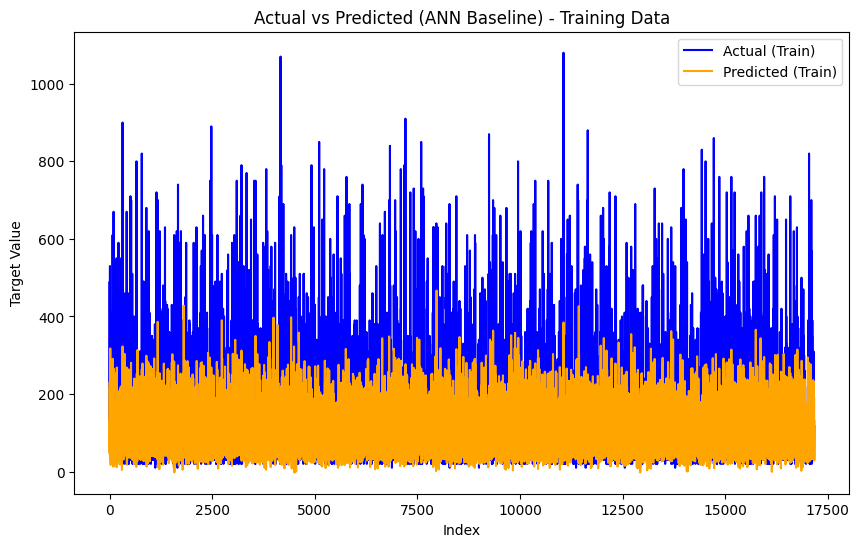

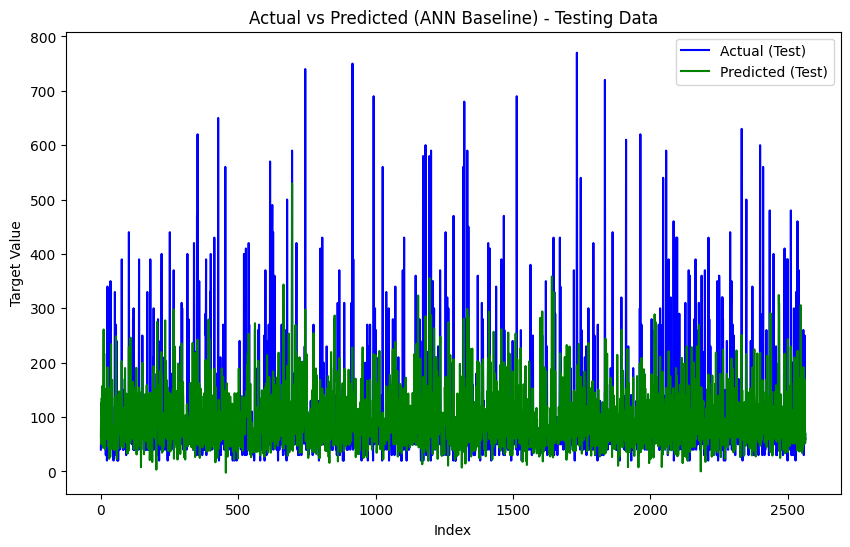

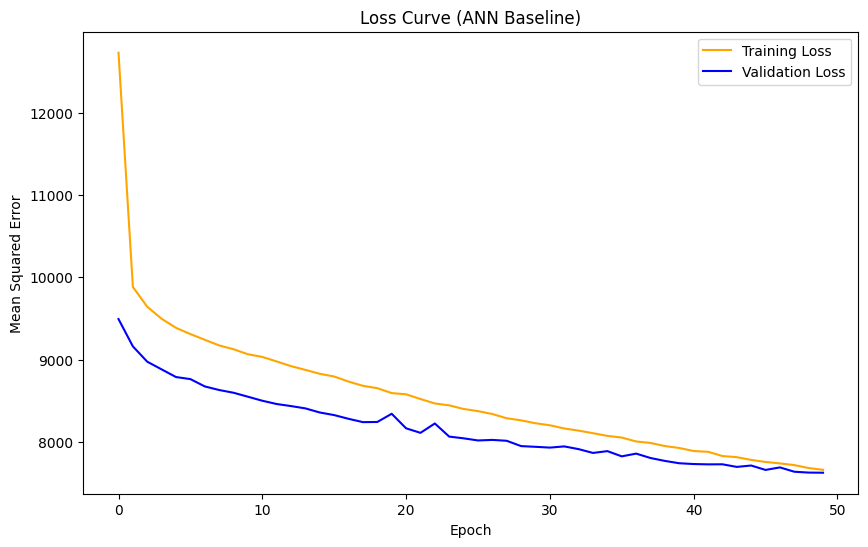


Program Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model ANN baseline
def create_ann_model():
    model = Sequential()
    model.add(Dense(units=64, kernel_regularizer=l2(0.01), input_dim=x_train.shape[1], activation='relu'))  # Lapisan input dan pertama
    model.add(Dense(units=32, kernel_regularizer=l2(0.01), activation='relu'))  # Lapisan tersembunyi
    model.add(Dense(units=1))  # Lapisan output (regresi)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Membuat dan melatih model ANN
ann_baseline = create_ann_model()
history = ann_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Prediksi untuk data training dan testing
train_pred_baseline = ann_baseline.predict(x_train)
test_pred_baseline = ann_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_baseline = mean_squared_error(y_train, train_pred_baseline)
train_rmse_baseline = np.sqrt(train_mse_baseline)
train_mae_baseline = mean_absolute_error(y_train, train_pred_baseline)
train_r2_baseline = r2_score(y_train, train_pred_baseline)

test_mse_baseline = mean_squared_error(y_test, test_pred_baseline)
test_rmse_baseline = np.sqrt(test_mse_baseline)
test_mae_baseline = mean_absolute_error(y_test, test_pred_baseline)
test_r2_baseline = r2_score(y_test, test_pred_baseline)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model ANN Baseline pada Data Training:")
print(f"Train MSE: {train_mse_baseline:.2f}")
print(f"Train RMSE: {train_rmse_baseline:.2f}")
print(f"Train MAE: {train_mae_baseline:.2f}")
print(f"Train R2 Score: {train_r2_baseline:.2f}")

print("\nEvaluasi Model ANN Baseline pada Data Testing:")
print(f"Test MSE: {test_mse_baseline:.2f}")
print(f"Test RMSE: {test_rmse_baseline:.2f}")
print(f"Test MAE: {test_mae_baseline:.2f}")
print(f"Test R2 Score: {test_r2_baseline:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (ANN Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (ANN Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model ANN Baseline telah dievaluasi dan hasil divisualisasikan.")

Model ANN dengan regularisasi L2 menunjukkan hasil yang kurang memuaskan, dengan MSE untuk data pelatihan lebih tinggi daripada data pengujian (7577.47 vs 6789.01), yang mengindikasikan potensi overfitting meskipun regularisasi telah diterapkan. Nilai RMSE pada data pelatihan (87.05) lebih tinggi dibandingkan data pengujian (82.40), menunjukkan ketidakakuratan dalam prediksi, sementara nilai MAE yang hampir serupa antara data pelatihan (49.27) dan pengujian (48.44) mengindikasikan kesalahan yang konsisten namun tidak signifikan. R² yang rendah (0.29 untuk pelatihan dan 0.25 untuk pengujian) menandakan model gagal menjelaskan variabilitas data dengan baik. Fluktuasi loss yang lambat menandakan ketidakstabilan dalam pelatihan, dan meskipun regularisasi L2 diterapkan, model belum sepenuhnya mengkonvergensi. Secara keseluruhan, model ini membutuhkan perbaikan lebih lanjut, baik dari sisi arsitektur, teknik regularisasi, atau jumlah epoch, untuk meningkatkan akurasi dan performa prediksi.

**Analisis Hasil**

Dari hasil analisis ketiga model, Skema 2 (Model dengan optimasi hyperparameter) menunjukkan hasil yang paling menjanjikan. Meskipun ada fluktuasi dalam kurva loss dan sedikit ketidakstabilan pada data pengujian, model ini memiliki MSE yang lebih rendah dibandingkan dengan Skema 1 dan Skema 3, serta nilai R² pada data pelatihan yang lebih tinggi (0.49). Ini menunjukkan adanya hubungan yang cukup kuat antara prediksi dan data aktual pada data pelatihan. Meskipun R² pada data pengujian masih rendah (0.26), peningkatan yang signifikan pada data pelatihan menunjukkan bahwa optimasi hyperparameter dapat membawa perbaikan dalam performa model. Sementara itu, Skema 1 dan Skema 3 menunjukkan hasil yang kurang memuaskan, dengan model Skema 1 mengalami kesulitan dalam generalisasi (R² data pengujian 0.20), dan Skema 3 mengalami potensi overfitting dengan MSE pada data pelatihan yang lebih tinggi dibandingkan data pengujian. Oleh karena itu, Skema 2 memiliki keunggulan karena menunjukkan potensi untuk meningkatkan kinerja model lebih lanjut dengan optimasi hyperparameter yang tepat.

# **Pembangunan Model Baseline dengan RNN**

Model Baseline dengan Recurrent Neural Network (RNN) dirancang untuk memprediksi nilai kontinu melalui jaringan saraf berulang (RNN). Model ini menggunakan satu lapisan RNN dengan 50 unit dan fungsi aktivasi ReLU untuk menangani data input berbentuk urutan, kemudian diikuti oleh lapisan Dense untuk menghasilkan output regresi. Model ini dikompilasi dengan optimizer Adam dan loss function Mean Squared Error (MSE). Selama pelatihan, model dilatih menggunakan data pelatihan selama 50 epoch dengan batch size 32, serta melakukan validasi menggunakan 20% data pelatihan. Evaluasi model dilakukan dengan menghitung metrik MSE, RMSE, MAE, dan R² pada data pelatihan dan pengujian untuk menilai performa prediksi. Visualisasi hasil pelatihan dan pengujian menunjukkan perbandingan antara nilai aktual dan prediksi, serta menggambarkan perubahan loss selama pelatihan.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 13494.6230 - val_loss: 9847.7529
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10113.1270 - val_loss: 9729.7139
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9856.2969 - val_loss: 9699.5293
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 10187.3896 - val_loss: 9404.4912
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9729.6562 - val_loss: 9641.2285
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10318.6270 - val_loss: 8839.6172
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9219.7744 - val_loss: 8913.1318
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9825.7520 - val_loss: 8753.7832
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9844.5518 - val_loss: 8757.5850
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9232.4111 - val_loss: 8651.1367
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 8810.3535 - va

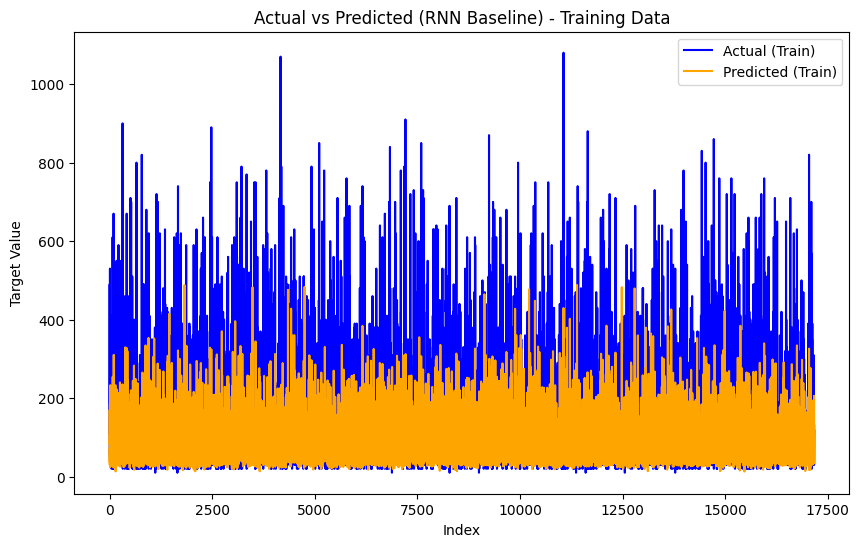

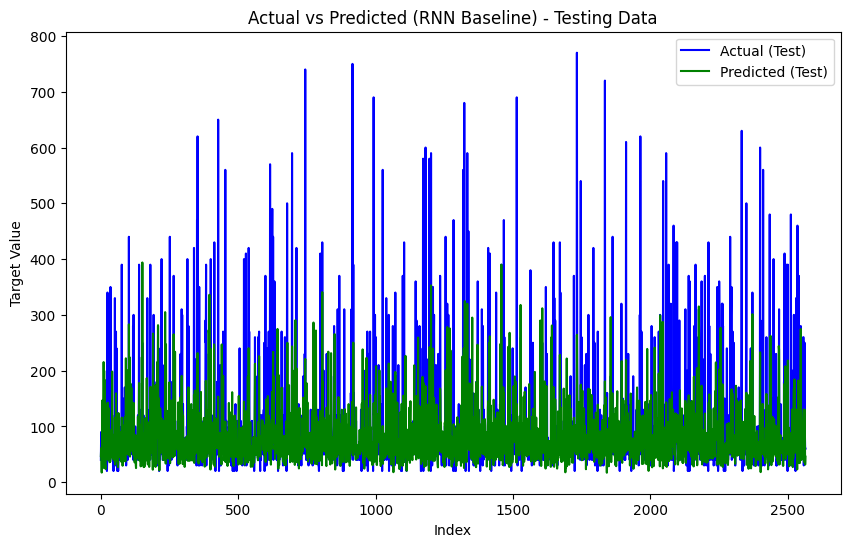

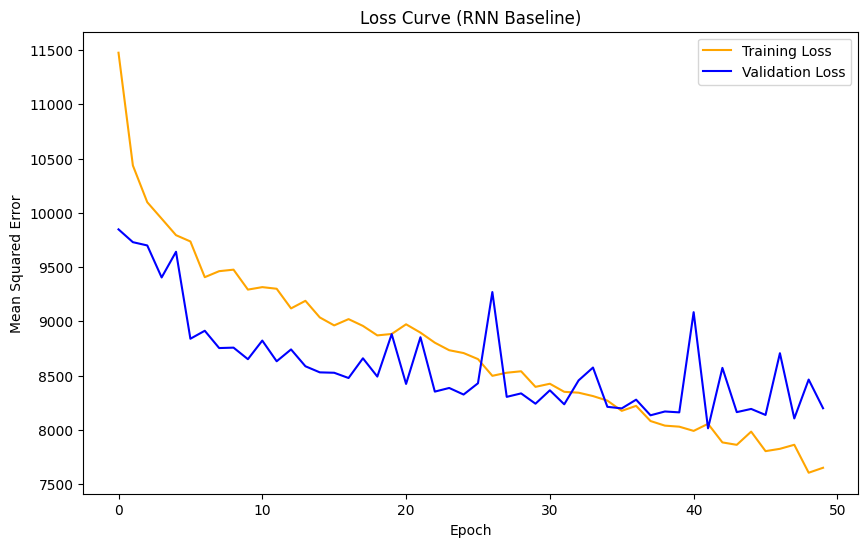


Program Selesai. Model RNN Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model RNN Baseline
rnn_model_baseline = Sequential()
rnn_model_baseline.add(SimpleRNN(50, activation='relu', input_shape=(x_train.shape[1], 1)))  # Lapisan RNN
rnn_model_baseline.add(Dense(1))  # Lapisan output untuk regresi

# Mengkompilasi model
rnn_model_baseline.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model
history_rnn_baseline = rnn_model_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2  # Menggunakan 20% data untuk validasi
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_baseline = rnn_model_baseline.predict(x_train)
test_pred_baseline = rnn_model_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_baseline = mean_squared_error(y_train, train_pred_baseline)
train_rmse_baseline = np.sqrt(train_mse_baseline)
train_mae_baseline = mean_absolute_error(y_train, train_pred_baseline)
train_r2_baseline = r2_score(y_train, train_pred_baseline)

test_mse_baseline = mean_squared_error(y_test, test_pred_baseline)
test_rmse_baseline = np.sqrt(test_mse_baseline)
test_mae_baseline = mean_absolute_error(y_test, test_pred_baseline)
test_r2_baseline = r2_score(y_test, test_pred_baseline)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model RNN Baseline pada Data Training:")
print(f"Train MSE: {train_mse_baseline:.2f}")
print(f"Train RMSE: {train_rmse_baseline:.2f}")
print(f"Train MAE: {train_mae_baseline:.2f}")
print(f"Train R2 Score: {train_r2_baseline:.2f}")

print("\nEvaluasi Model RNN Baseline pada Data Testing:")
print(f"Test MSE: {test_mse_baseline:.2f}")
print(f"Test RMSE: {test_rmse_baseline:.2f}")
print(f"Test MAE: {test_mae_baseline:.2f}")
print(f"Test R2 Score: {test_r2_baseline:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (RNN Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (RNN Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_rnn_baseline.history['loss'], label='Training Loss', color='orange')
plt.plot(history_rnn_baseline.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (RNN Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model RNN Baseline telah dievaluasi dan hasil divisualisasikan.")

Hasil pelatihan model RNN Baseline menunjukkan performa yang cukup variatif dengan indikasi adanya tantangan dalam memodelkan data secara akurat. Metrik evaluasi pada data pelatihan dan pengujian menunjukkan bahwa model ini memiliki MSE dan RMSE yang relatif tinggi, yakni masing-masing 7717.87 dan 87.85 pada data pelatihan, serta 7161.33 dan 84.62 pada data pengujian. Nilai MAE yang terhitung hampir sama antara data pelatihan dan pengujian (45.24 dan 45.27) mengindikasikan bahwa model cenderung memberikan prediksi yang kurang presisi dalam skala numerik. R² score yang rendah (0.28 pada data pelatihan dan 0.21 pada data pengujian) juga mengindikasikan bahwa model hanya mampu menjelaskan sebagian kecil dari variabilitas data, sehingga performanya dapat dianggap masih terbatas untuk aplikasi regresi yang lebih kompleks. Kurva loss selama pelatihan menunjukkan fluktuasi, meskipun ada penurunan loss secara keseluruhan, yang menandakan adanya kesulitan dalam konvergensi model.

**Eksplorasi Model - RNN**

**Skema 1 - Model dengan dropout untuk mengurangi overfitting.**

Skema 1 dalam kode ini menerapkan teknik dropout pada model Recurrent Neural Network (RNN) untuk mengurangi overfitting, yaitu kondisi di mana model terlalu mempelajari pola spesifik dari data pelatihan sehingga kesulitan generalisasi pada data baru. Dropout, yang ditambahkan setelah lapisan RNN, secara acak mematikan 30% dari neuron selama pelatihan, sehingga model tidak terlalu bergantung pada neuron tertentu dan mampu belajar representasi yang lebih umum. Model ini juga menggunakan optimizer Adam dan fungsi loss mean squared error (MSE), dilatih selama 50 epoch dengan data validasi 20% untuk memantau kinerja pada data yang tidak terlihat. Evaluasi model dilakukan menggunakan metrik seperti MSE, RMSE, MAE, dan R2 score pada data pelatihan dan pengujian, sementara visualisasi dilakukan untuk membandingkan hasil prediksi dengan data aktual serta memantau perubahan loss selama pelatihan. Teknik dropout ini berfungsi sebagai regularisasi untuk mencegah overfitting, meningkatkan kemampuan generalisasi model, dan memastikan model dapat bekerja efektif dengan data baru.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 14092.9834 - val_loss: 11991.8369
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 11685.1543 - val_loss: 9754.5508
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10542.4365 - val_loss: 9125.8818
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10895.9971 - val_loss: 9318.2256
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9418.8594 - val_loss: 8953.2500
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 10430.6104 - val_loss: 8887.6797
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9785.0527 - val_loss: 8816.7529
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 10051.6553 - val_loss: 9145.8643
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 10481.5449 - val_loss: 8792.0967
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9318.6602 - val_loss: 8706.8076
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9613.0166 

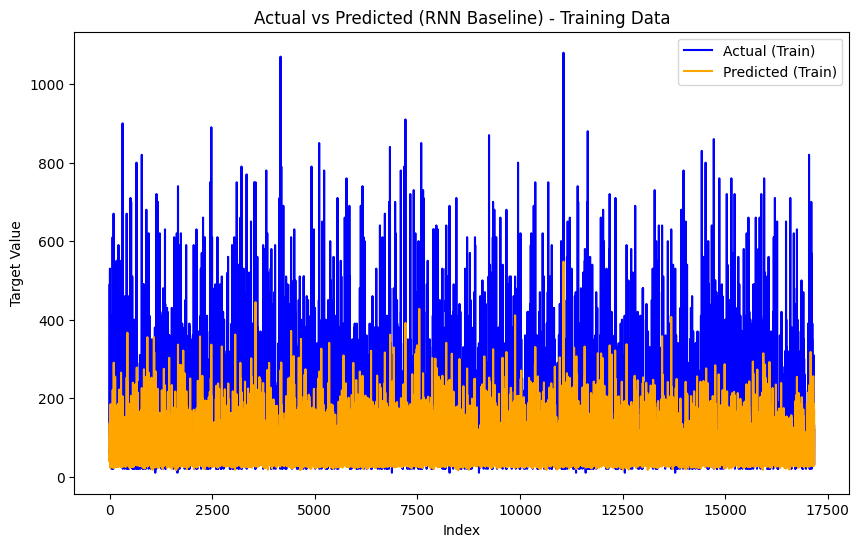

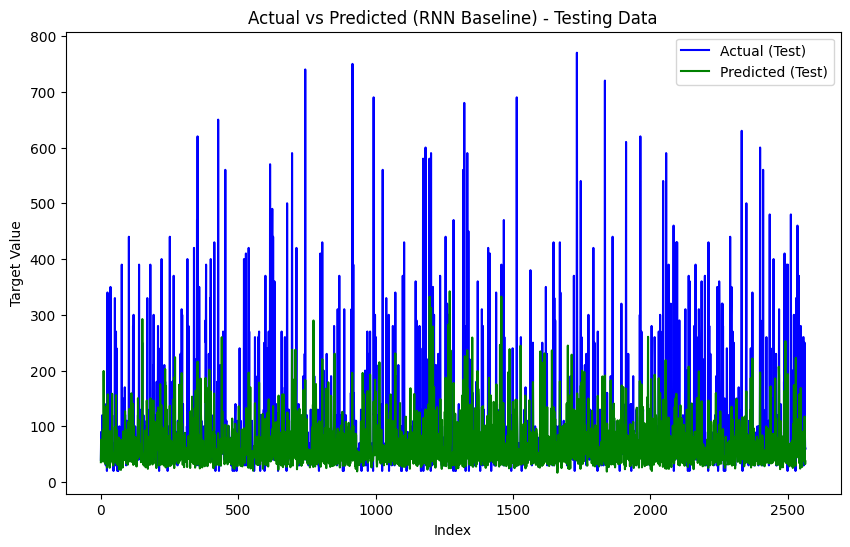

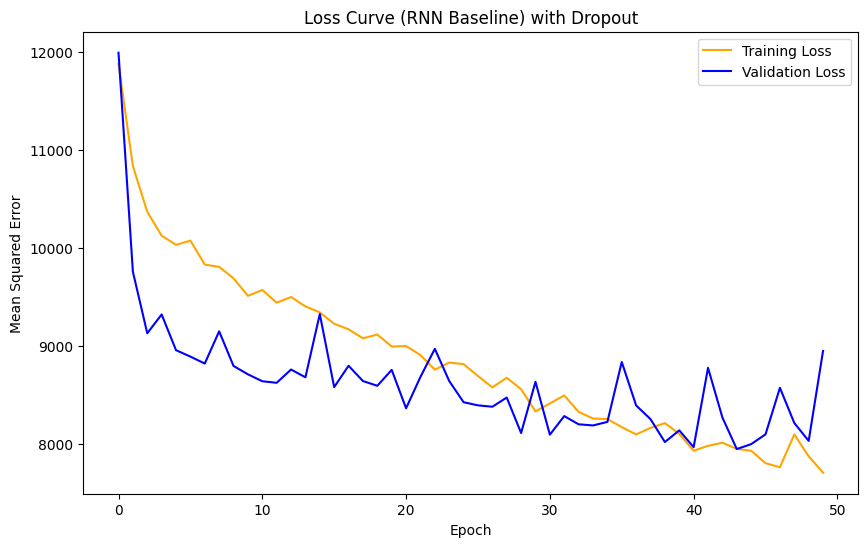


Program Selesai. Model RNN Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model RNN Baseline dengan Dropout untuk mengurangi overfitting
rnn_model_baseline = Sequential()
rnn_model_baseline.add(SimpleRNN(50, activation='relu', input_shape=(x_train.shape[1], 1)))  # Lapisan RNN
rnn_model_baseline.add(Dropout(0.3))  # Menambahkan Dropout dengan tingkat 30%
rnn_model_baseline.add(Dense(1))  # Lapisan output untuk regresi

# Mengkompilasi model
rnn_model_baseline.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model
history_rnn_baseline = rnn_model_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2  # Menggunakan 20% data untuk validasi
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_baseline = rnn_model_baseline.predict(x_train)
test_pred_baseline = rnn_model_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_baseline = mean_squared_error(y_train, train_pred_baseline)
train_rmse_baseline = np.sqrt(train_mse_baseline)
train_mae_baseline = mean_absolute_error(y_train, train_pred_baseline)
train_r2_baseline = r2_score(y_train, train_pred_baseline)

test_mse_baseline = mean_squared_error(y_test, test_pred_baseline)
test_rmse_baseline = np.sqrt(test_mse_baseline)
test_mae_baseline = mean_absolute_error(y_test, test_pred_baseline)
test_r2_baseline = r2_score(y_test, test_pred_baseline)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model RNN Baseline pada Data Training:")
print(f"Train MSE: {train_mse_baseline:.2f}")
print(f"Train RMSE: {train_rmse_baseline:.2f}")
print(f"Train MAE: {train_mae_baseline:.2f}")
print(f"Train R2 Score: {train_r2_baseline:.2f}")

print("\nEvaluasi Model RNN Baseline pada Data Testing:")
print(f"Test MSE: {test_mse_baseline:.2f}")
print(f"Test RMSE: {test_rmse_baseline:.2f}")
print(f"Test MAE: {test_mae_baseline:.2f}")
print(f"Test R2 Score: {test_r2_baseline:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_baseline, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (RNN Baseline) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_baseline, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (RNN Baseline) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_rnn_baseline.history['loss'], label='Training Loss', color='orange')
plt.plot(history_rnn_baseline.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (RNN Baseline) with Dropout")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model RNN Baseline telah dievaluasi dan hasil divisualisasikan.")

Hasil dari Skema 1, yang menerapkan teknik dropout untuk mengurangi overfitting pada model RNN, menunjukkan beberapa dinamika yang menarik. Selama pelatihan, nilai loss training dan validasi mengalami fluktuasi, dengan penurunan pada beberapa epoch awal namun kadang meningkat pada epoch berikutnya. Misalnya, pada epoch ke-50, nilai loss training adalah 7444.20, sedangkan loss validasi berakhir di 8945.56, yang menunjukkan adanya beberapa ketidakstabilan pada model meskipun dropout diterapkan. Hal ini bisa mengindikasikan bahwa model belum sepenuhnya mengatasi overfitting, meskipun dropout membantu mengurangi kecenderungan untuk menghafal data pelatihan. Metrik evaluasi menunjukkan bahwa model masih belum optimal: MSE pelatihan sebesar 8370.14 dan MSE pengujian 7855.52 mengindikasikan kinerja yang masih jauh dari sempurna. R2 score yang rendah, masing-masing 0.22 pada data pelatihan dan 0.13 pada data pengujian, menunjukkan bahwa model tidak mampu menjelaskan variasi target dengan baik.

**Skema 2 - Model dengan optimasi hyperparameter (jumlah layer dan unit).**

Skema 2 - Model dengan optimasi hyperparameter (jumlah layer dan unit) adalah pendekatan untuk meningkatkan performa model jaringan syaraf tiruan (RNN) dengan menyesuaikan jumlah lapisan (layers) dan jumlah unit pada setiap lapisan. Model ini menggunakan tiga lapisan RNN berturut-turut, di mana lapisan pertama memiliki 200 unit, lapisan kedua 150 unit, dan lapisan ketiga 100 unit. Setiap lapisan RNN dilengkapi dengan fungsi aktivasi ReLU untuk menangani non-linearitas dan dropout sebesar 30% untuk mengurangi risiko overfitting. Model ini juga dilengkapi dengan lapisan Dense untuk menghasilkan output regresi. Optimizer Adam digunakan untuk mengoptimalkan fungsi kerugian Mean Squared Error (MSE). Model ini dilatih dengan 50 epoch dan ukuran batch 32, menggunakan data pelatihan dengan 20% data yang digunakan untuk validasi. Evaluasi dilakukan dengan menggunakan metrik MSE, RMSE, MAE, dan R2 Score pada data pelatihan dan pengujian. Hasil prediksi pada data pelatihan dan pengujian divisualisasikan untuk memberikan gambaran tentang seberapa baik model ini dalam memprediksi nilai target.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - loss: 11614.1396 - val_loss: 10883.8027
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 11143.2773 - val_loss: 10226.0674
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 11047.3252 - val_loss: 9398.0557
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 9829.3652 - val_loss: 8722.0020
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - loss: 9083.4746 - val_loss: 8583.2334
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 8929.9170 - val_loss: 8778.5977
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - loss: 9211.6631 - val_loss: 8882.6396
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 8841.3730 - val_loss: 8347.5137
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 8596.2129 - val_loss: 7932.4766
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 8736.0098 - val_loss: 8571.6211
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step

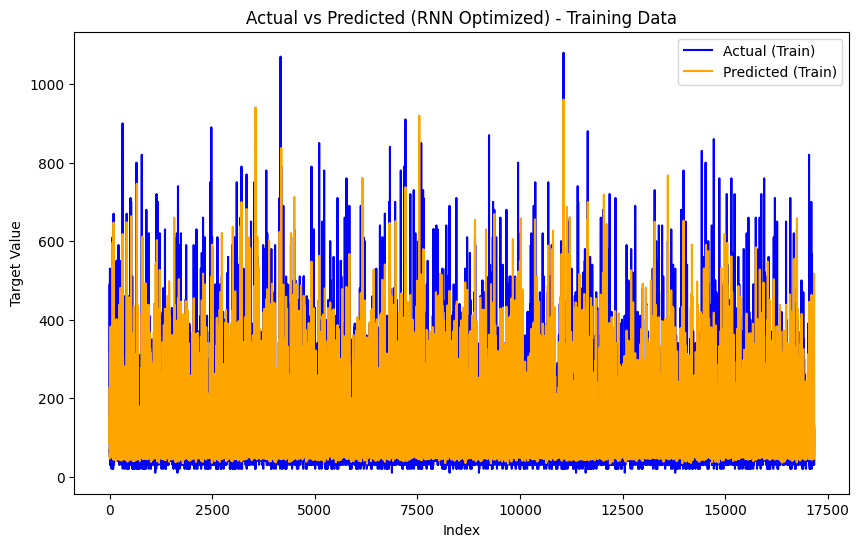

Text(0, 0.5, 'Target Value')

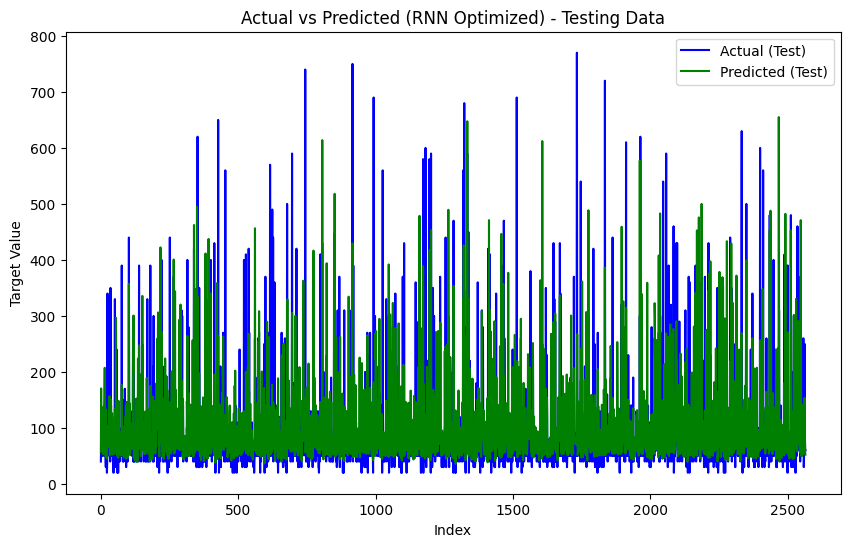

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menyusun model RNN dengan optimasi hyperparameter (jumlah layer dan unit)
rnn_model_optimized = Sequential()

# Menambah lapisan RNN pertama dengan 200 unit
rnn_model_optimized.add(SimpleRNN(200, activation='relu', input_shape=(x_train.shape[1], 1), return_sequences=True))
rnn_model_optimized.add(Dropout(0.3))  # Dropout untuk mengurangi overfitting

# Menambah lapisan RNN kedua dengan 150 unit
rnn_model_optimized.add(SimpleRNN(150, activation='relu', return_sequences=True))
rnn_model_optimized.add(Dropout(0.3))

# Menambah lapisan RNN ketiga dengan 100 unit
rnn_model_optimized.add(SimpleRNN(100, activation='relu'))
rnn_model_optimized.add(Dropout(0.3))

# Menambah lapisan Dense untuk output regresi
rnn_model_optimized.add(Dense(1))

# Mengkompilasi model dengan optimizer Adam
rnn_model_optimized.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model dengan data pelatihan
history_rnn_optimized = rnn_model_optimized.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2  # Menggunakan 20% data untuk validasi
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_optimized = rnn_model_optimized.predict(x_train)
test_pred_optimized = rnn_model_optimized.predict(x_test)

# Menghitung metrik evaluasi
train_mse_optimized = mean_squared_error(y_train, train_pred_optimized)
train_rmse_optimized = np.sqrt(train_mse_optimized)
train_mae_optimized = mean_absolute_error(y_train, train_pred_optimized)
train_r2_optimized = r2_score(y_train, train_pred_optimized)

test_mse_optimized = mean_squared_error(y_test, test_pred_optimized)
test_rmse_optimized = np.sqrt(test_mse_optimized)
test_mae_optimized = mean_absolute_error(y_test, test_pred_optimized)
test_r2_optimized = r2_score(y_test, test_pred_optimized)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model RNN Optimized pada Data Training:")
print(f"Train MSE: {train_mse_optimized:.2f}")
print(f"Train RMSE: {train_rmse_optimized:.2f}")
print(f"Train MAE: {train_mae_optimized:.2f}")
print(f"Train R2 Score: {train_r2_optimized:.2f}")

print("\nEvaluasi Model RNN Optimized pada Data Testing:")
print(f"Test MSE: {test_mse_optimized:.2f}")
print(f"Test RMSE: {test_rmse_optimized:.2f}")
print(f"Test MAE: {test_mae_optimized:.2f}")
print(f"Test R2 Score: {test_r2_optimized:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_optimized, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (RNN Optimized) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_optimized, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (RNN Optimized) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")

Hasil evaluasi model RNN yang telah dioptimalkan menunjukkan performa yang cukup baik pada data pelatihan dengan MSE sebesar 4840.91, RMSE sebesar 69.58, MAE sebesar 39.56, dan skor R2 sebesar 0.55, yang menunjukkan bahwa model mampu menjelaskan 55% variabilitas dalam data pelatihan. Namun, performa pada data pengujian masih relatif lebih rendah dengan MSE sebesar 6558.22, RMSE sebesar 80.98, MAE sebesar 44.48, dan skor R2 sebesar 0.28. Hal ini mengindikasikan adanya kemungkinan overfitting, di mana model lebih cocok untuk data pelatihan dibandingkan data pengujian. Selain itu, perbedaan performa yang signifikan menunjukkan bahwa model memerlukan perbaikan lebih lanjut, seperti pengaturan ulang parameter model, pemrosesan data lebih lanjut, atau eksplorasi arsitektur yang berbeda untuk meningkatkan generalisasi pada data pengujian.

**Skema 3 - Model dengan regularisasi L2.**

Skema 3 - Model dengan regularisasi L2 menggunakan pendekatan Regularized Simple Recurrent Neural Network (RNN) untuk mengatasi overfitting dengan menambahkan penalti pada bobot model selama proses pelatihan. Model ini terdiri dari dua lapisan RNN dengan 100 dan 50 unit masing-masing, yang dilengkapi dengan fungsi aktivasi ReLU dan regularisasi L2 dengan nilai penalti 0.01, serta satu lapisan Dense untuk output regresi. Lapisan pertama RNN diatur untuk mengembalikan seluruh urutan keluaran (return_sequences=True), memungkinkan informasi temporal diteruskan ke lapisan berikutnya. Model dikompilasi menggunakan optimasi Adam dan fungsi loss mean squared error, serta dilatih selama 50 epoch dengan validasi 20% data. Regularisasi L2 membantu membatasi pertumbuhan bobot yang berlebihan, sehingga meningkatkan generalisasi model pada data baru, yang dievaluasi menggunakan metrik MSE, RMSE, MAE, dan R2.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 12250.7441 - val_loss: 9533.3193
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 10454.9238 - val_loss: 9519.3125
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 10077.3096 - val_loss: 9513.9727
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 9720.0029 - val_loss: 8703.2021
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 9512.0547 - val_loss: 8931.6533
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 9312.9492 - val_loss: 9255.5098
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 9071.0127 - val_loss: 8727.9297
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 9202.3037 - val_loss: 8548.6699
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 8558.3232 - val_loss: 9954.2119
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 9036.7568 - val_loss: 8834.8779
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 89

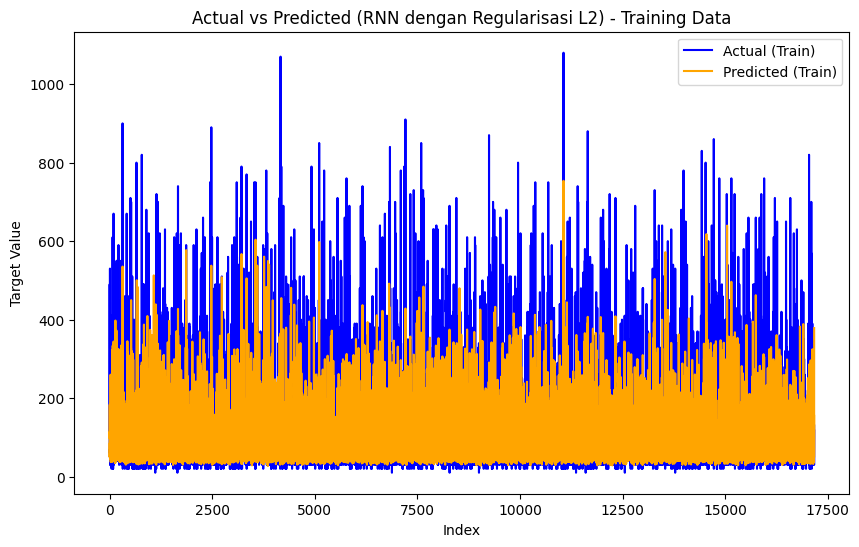

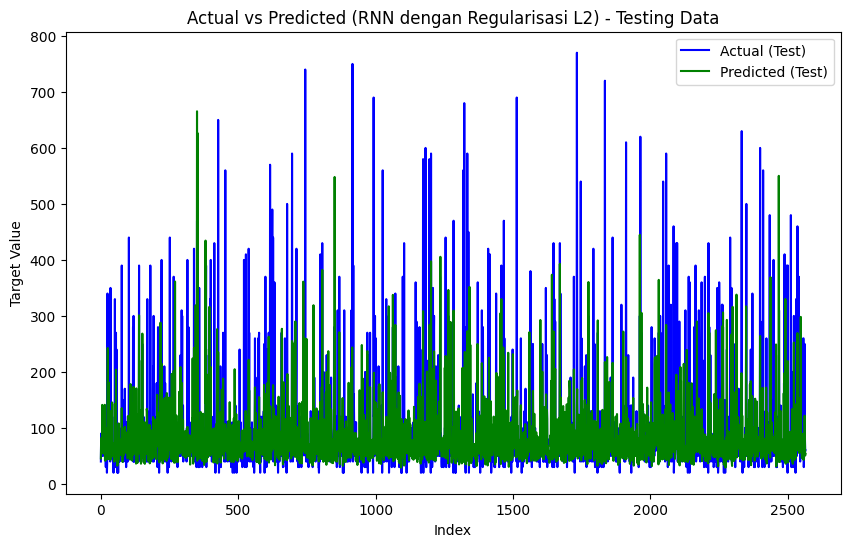

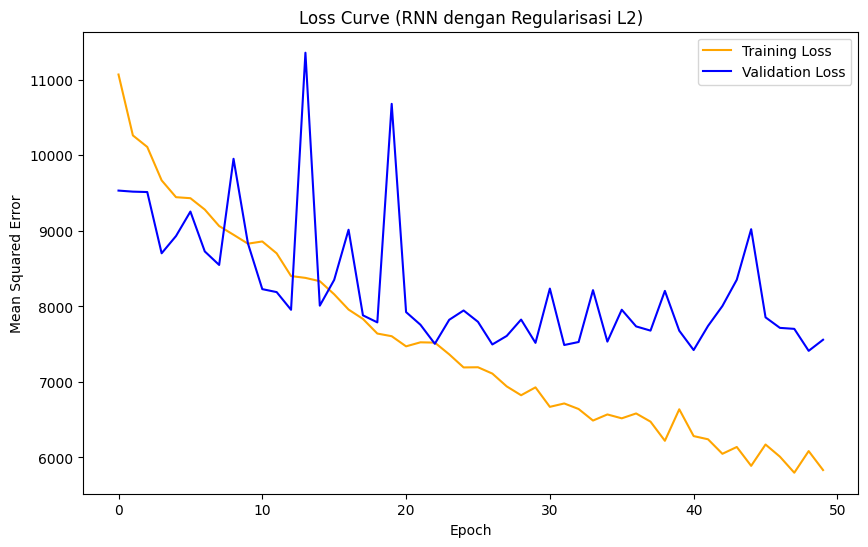


Program Selesai. Model RNN dengan Regularisasi L2 telah dievaluasi dan hasil divisualisasikan.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Untuk L2 Regularization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model RNN dengan regularisasi L2
rnn_model_regularized = Sequential()
rnn_model_regularized.add(SimpleRNN(100, activation='relu', kernel_regularizer=l2(0.01), return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnn_model_regularized.add(SimpleRNN(50, activation='relu', kernel_regularizer=l2(0.01)))  # Tidak perlu return_sequences di lapisan terakhir
rnn_model_regularized.add(Dense(1))  # Lapisan output untuk regresi

# Mengkompilasi model
rnn_model_regularized.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model
history_rnn_regularized = rnn_model_regularized.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_regularized = rnn_model_regularized.predict(x_train)
test_pred_regularized = rnn_model_regularized.predict(x_test)

# Menghitung metrik evaluasi
train_mse_regularized = mean_squared_error(y_train, train_pred_regularized)
train_rmse_regularized = np.sqrt(train_mse_regularized)
train_mae_regularized = mean_absolute_error(y_train, train_pred_regularized)
train_r2_regularized = r2_score(y_train, train_pred_regularized)

test_mse_regularized = mean_squared_error(y_test, test_pred_regularized)
test_rmse_regularized = np.sqrt(test_mse_regularized)
test_mae_regularized = mean_absolute_error(y_test, test_pred_regularized)
test_r2_regularized = r2_score(y_test, test_pred_regularized)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model RNN dengan Regularisasi L2 pada Data Training:")
print(f"Train MSE: {train_mse_regularized:.2f}")
print(f"Train RMSE: {train_rmse_regularized:.2f}")
print(f"Train MAE: {train_mae_regularized:.2f}")
print(f"Train R2 Score: {train_r2_regularized:.2f}")

print("\nEvaluasi Model RNN dengan Regularisasi L2 pada Data Testing:")
print(f"Test MSE: {test_mse_regularized:.2f}")
print(f"Test RMSE: {test_rmse_regularized:.2f}")
print(f"Test MAE: {test_mae_regularized:.2f}")
print(f"Test R2 Score: {test_r2_regularized:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_regularized, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (RNN dengan Regularisasi L2) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_regularized, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (RNN dengan Regularisasi L2) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_rnn_regularized.history['loss'], label='Training Loss', color='orange')
plt.plot(history_rnn_regularized.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (RNN dengan Regularisasi L2)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model RNN dengan Regularisasi L2 telah dievaluasi dan hasil divisualisasikan.")

Berdasarkan hasil pelatihan model Skema 3 dengan regularisasi L2, terlihat bahwa model berhasil mengurangi loss secara bertahap selama 50 epoch, meskipun dengan fluktuasi yang cukup signifikan pada beberapa epoch. Nilai Train MSE sebesar 6143.65 menunjukkan bahwa model memiliki tingkat kesalahan yang moderat pada data pelatihan, dengan R2 Score sebesar 0.43 mengindikasikan bahwa model mampu menjelaskan sekitar 43% variabilitas dalam data pelatihan. Namun, performa pada data pengujian kurang optimal, dengan Test MSE sebesar 6659.02 dan R2 Score hanya 0.26, yang menunjukkan bahwa model memiliki kemampuan prediksi yang terbatas pada data baru. Fluktuasi pada kurva validation loss juga menandakan adanya potensi overfitting, meskipun regularisasi L2 telah diterapkan.

**Analisis Baseline dan Skema Model**

Model baseline dengan arsitektur RNN menunjukkan performa yang paling sederhana, dengan MSE yang tinggi baik pada data pelatihan (7717.87) maupun pengujian (7161.33). R² score yang rendah pada baseline (0.28 pada data pelatihan dan 0.21 pada data pengujian) menegaskan bahwa model baseline hanya mampu menjelaskan sebagian kecil variabilitas data. Hal ini mengindikasikan bahwa model ini belum cukup kompleks untuk menangkap pola data yang lebih rumit.

Dibandingkan dengan baseline, Skema 1 yang menerapkan dropout menunjukkan hasil yang lebih stabil pada aspek generalisasi. Namun, dropout tidak sepenuhnya mengatasi masalah overfitting, terlihat dari MSE pengujian (7855.52) yang masih tinggi. R² score pengujian sebesar 0.13 menjadi indikasi bahwa model ini justru mengalami penurunan performa dalam menjelaskan variabilitas data dibanding baseline.

Skema 2, yang memanfaatkan optimasi hyperparameter, memberikan peningkatan signifikan pada data pelatihan dengan MSE sebesar 4840.91 dan R² score 0.55. Namun, performa pada data pengujian (MSE: 6558.22, R²: 0.28) masih menunjukkan kesenjangan yang mengindikasikan kemungkinan overfitting. Meskipun demikian, performa pengujian skema ini masih lebih baik dibanding baseline dan skema lainnya.

Skema 3, dengan penerapan regularisasi L2, berhasil menurunkan tingkat kesalahan pada data pelatihan (MSE: 6143.65, R²: 0.43) dibanding baseline. Namun, performa pada data pengujian (MSE: 6659.02, R²: 0.26) tidak menunjukkan peningkatan yang signifikan dibanding baseline, menandakan bahwa penerapan regularisasi L2 saja belum cukup untuk meningkatkan generalisasi model secara signifikan.

Kesimpulan:
Dari keempat pendekatan, Skema 2 menunjukkan hasil terbaik dengan peningkatan yang signifikan pada data pelatihan dan performa pengujian yang lebih baik dibandingkan baseline. Meski demikian, kesenjangan antara data pelatihan dan pengujian pada semua skema menunjukkan perlunya perbaikan lebih lanjut, seperti eksplorasi arsitektur yang lebih kompleks atau penggunaan teknik augmentasi data untuk meningkatkan generalisasi model.

# **Pembangunan Model Baseline dengan LSTM**

Baseline dengan LSTM menggunakan parameter default adalah model awal yang dibangun untuk melakukan regresi dengan pendekatan Long Short-Term Memory (LSTM). Model ini terdiri dari satu lapisan LSTM dengan 50 unit dan fungsi aktivasi ReLU, diikuti oleh lapisan Dense tunggal sebagai output untuk memprediksi nilai kontinu. Model dikompilasi menggunakan optimizer Adam dan fungsi loss mean squared error (MSE). Pelatihan dilakukan selama 50 epoch dengan ukuran batch 32, dan 20% data digunakan untuk validasi. Hasil prediksi dievaluasi menggunakan metrik seperti MSE, RMSE, MAE, dan R² score, baik untuk data pelatihan maupun pengujian. Kurva loss juga divisualisasikan untuk menganalisis performa model selama pelatihan, memberikan gambaran awal tentang kemampuan model dalam menangkap pola dari data. Model baseline ini bertujuan untuk menjadi acuan awal sebelum melakukan optimasi lebih lanjut.

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 15090.6084 - val_loss: 9979.0332
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 11116.6904 - val_loss: 9874.0381
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 10263.2988 - val_loss: 9592.0449
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 10554.9795 - val_loss: 9588.2812
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 10703.7266 - val_loss: 10104.2432
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 10317.0215 - val_loss: 9752.2842
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 10273.2432 - val_loss: 10216.3965
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 10020.3535 - val_loss: 9434.3320
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 10182.0293 - val_loss: 9368.2920
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 10118.6064 - val_loss: 9270.3535
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - l

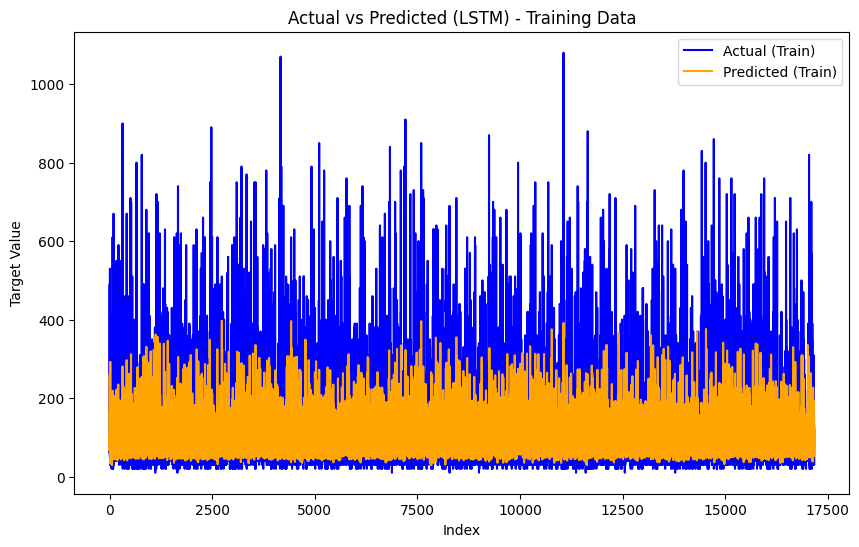

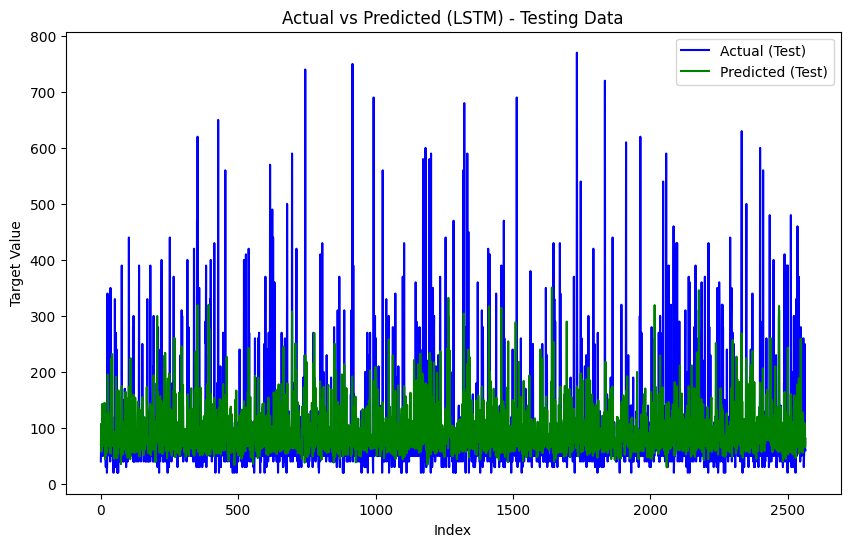

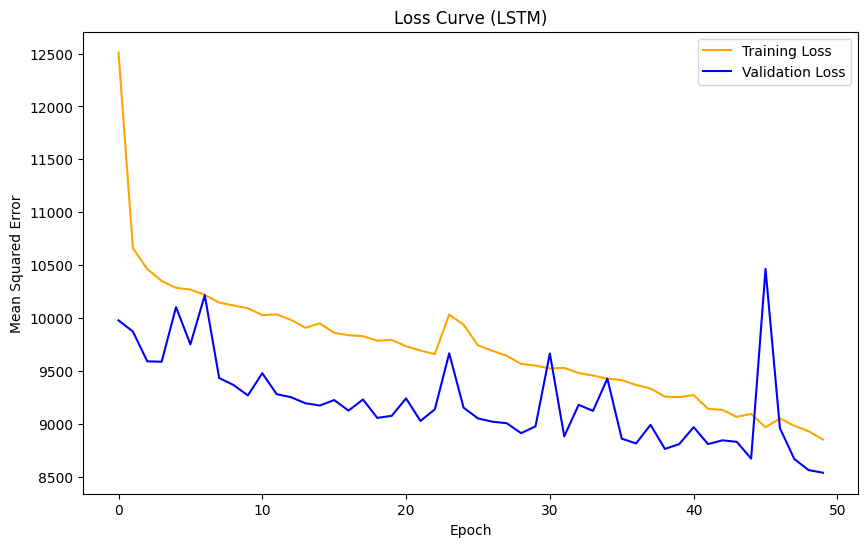


Program Selesai. Model LSTM Baseline telah dievaluasi dan hasil divisualisasikan.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model LSTM Baseline
lstm_model_baseline = Sequential()

# Lapisan LSTM dengan 50 unit dan aktivasi ReLU
lstm_model_baseline.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))

# Lapisan output untuk regresi
lstm_model_baseline.add(Dense(1))

# Mengkompilasi model dengan optimizer Adam dan loss function MSE
lstm_model_baseline.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model
history_lstm = lstm_model_baseline.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,  # 20% data digunakan untuk validasi
    verbose=1
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_lstm = lstm_model_baseline.predict(x_train)
test_pred_lstm = lstm_model_baseline.predict(x_test)

# Menghitung metrik evaluasi
train_mse_lstm = mean_squared_error(y_train, train_pred_lstm)
train_rmse_lstm = np.sqrt(train_mse_lstm)
train_mae_lstm = mean_absolute_error(y_train, train_pred_lstm)
train_r2_lstm = r2_score(y_train, train_pred_lstm)

test_mse_lstm = mean_squared_error(y_test, test_pred_lstm)
test_rmse_lstm = np.sqrt(test_mse_lstm)
test_mae_lstm = mean_absolute_error(y_test, test_pred_lstm)
test_r2_lstm = r2_score(y_test, test_pred_lstm)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LSTM (Dengan Dropout) pada Data Training:")
print(f"Train MSE: {train_mse_lstm:.2f}")
print(f"Train RMSE: {train_rmse_lstm:.2f}")
print(f"Train MAE: {train_mae_lstm:.2f}")
print(f"Train R2 Score: {train_r2_lstm:.2f}")

print("\nEvaluasi Model LSTM (Dengan Dropout) pada Data Testing:")
print(f"Test MSE: {test_mse_lstm:.2f}")
print(f"Test RMSE: {test_rmse_lstm:.2f}")
print(f"Test MAE: {test_mae_lstm:.2f}")
print(f"Test R2 Score: {test_r2_lstm:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_lstm, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (LSTM) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_lstm, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (LSTM) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='orange')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (LSTM)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model LSTM Baseline telah dievaluasi dan hasil divisualisasikan.")

Hasil pelatihan dan evaluasi model baseline LSTM menunjukkan bahwa meskipun terjadi penurunan loss pada data training dan validation selama 50 epoch, performa model masih relatif rendah. Nilai Train MSE sebesar 8579.54 dengan Train R² Score sebesar 0.20 menunjukkan model hanya mampu menjelaskan sekitar 20% variansi data training, sementara Test MSE sebesar 7381.13 dan Test R² Score sebesar 0.18 menunjukkan hasil serupa pada data testing. Nilai MAE sekitar 50 untuk kedua dataset mengindikasikan adanya perbedaan rata-rata yang cukup besar antara prediksi dan nilai aktual. Visualisasi loss mengungkap adanya sedikit fluktuasi, yang dapat mengindikasikan overfitting ringan. Namun, dengan performa keseluruhan yang masih terbatas, optimasi lebih lanjut seperti tuning parameter, normalisasi data, atau penggunaan arsitektur yang lebih kompleks diperlukan untuk meningkatkan kemampuan model.

**Skema 1 - Model dengan dropout untuk mengurangi overfitting.**

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 13977.2773 - val_loss: 9910.7021
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 10759.1338 - val_loss: 10685.0215
Epoch 3/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 10541.1436 - val_loss: 9665.9268
Epoch 4/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 10527.6318 - val_loss: 9855.0332
Epoch 5/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 10757.0381 - val_loss: 9692.2598
Epoch 6/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 10768.9082 - val_loss: 9910.9111
Epoch 7/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 10106.6934 - val_loss: 9502.2305
Epoch 8/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 10284.2578 - val_loss: 9608.1123
Epoch 9/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 10503.0898 - val_loss: 9525.7393
Epoch 10/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 10900.9453 - val_loss: 9550.4131
Epoch 11/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/ste

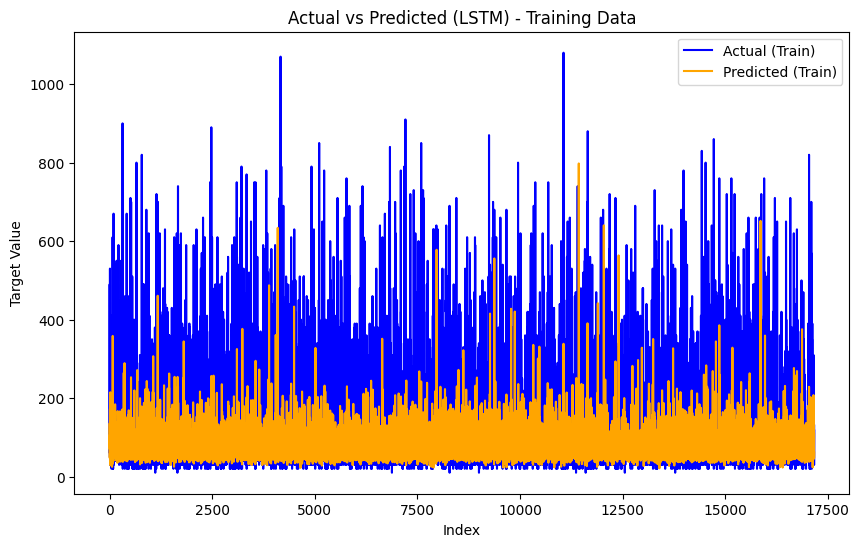

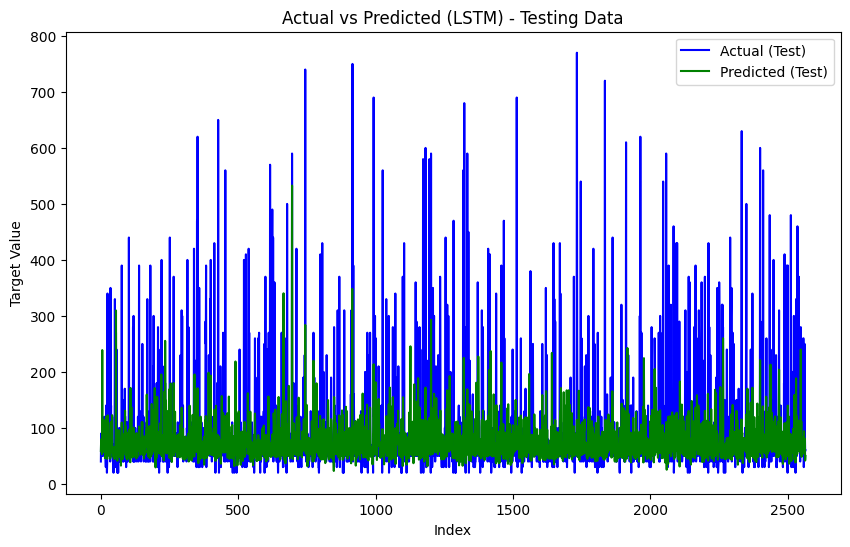

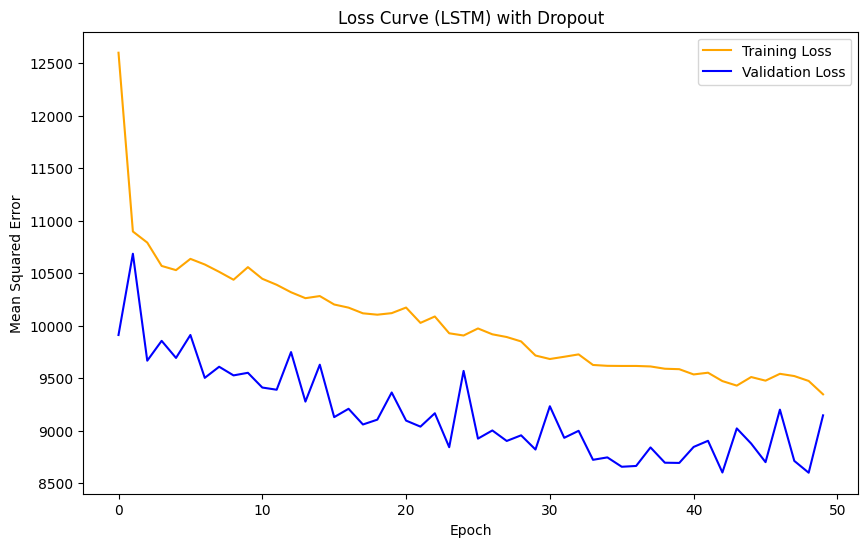


Program Selesai. Model LSTM dengan Dropout telah dievaluasi dan hasil divisualisasikan.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model LSTM dengan Dropout
lstm_model_dropout = Sequential()

# Lapisan LSTM dengan Dropout untuk mengurangi overfitting
lstm_model_dropout.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
lstm_model_dropout.add(Dropout(0.3))  # Menambahkan dropout dengan rate 0.3

# Lapisan output untuk regresi
lstm_model_dropout.add(Dense(1))

# Mengkompilasi model dengan optimizer Adam dan loss function MSE
lstm_model_dropout.compile(optimizer=Adam(), loss='mean_squared_error')

# Melatih model
history_lstm_dropout = lstm_model_dropout.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,  # 20% data digunakan untuk validasi
    verbose=1
)

# Memprediksi hasil pada data pelatihan dan pengujian
train_pred_lstm = lstm_model_dropout.predict(x_train)
test_pred_lstm = lstm_model_dropout.predict(x_test)

# Menghitung metrik evaluasi
train_mse_lstm = mean_squared_error(y_train, train_pred_lstm)
train_rmse_lstm = np.sqrt(train_mse_lstm)
train_mae_lstm = mean_absolute_error(y_train, train_pred_lstm)
train_r2_lstm = r2_score(y_train, train_pred_lstm)

test_mse_lstm = mean_squared_error(y_test, test_pred_lstm)
test_rmse_lstm = np.sqrt(test_mse_lstm)
test_mae_lstm = mean_absolute_error(y_test, test_pred_lstm)
test_r2_lstm = r2_score(y_test, test_pred_lstm)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LSTM (Dengan Dropout) pada Data Training:")
print(f"Train MSE: {train_mse_lstm:.2f}")
print(f"Train RMSE: {train_rmse_lstm:.2f}")
print(f"Train MAE: {train_mae_lstm:.2f}")
print(f"Train R2 Score: {train_r2_lstm:.2f}")

print("\nEvaluasi Model LSTM (Dengan Dropout) pada Data Testing:")
print(f"Test MSE: {test_mse_lstm:.2f}")
print(f"Test RMSE: {test_rmse_lstm:.2f}")
print(f"Test MAE: {test_mae_lstm:.2f}")
print(f"Test R2 Score: {test_r2_lstm:.2f}")

# Visualisasi hasil prediksi untuk data training
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual (Train)', color='blue')
plt.plot(train_pred_lstm, label='Predicted (Train)', color='orange')
plt.legend()
plt.title("Actual vs Predicted (LSTM) - Training Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi hasil prediksi untuk data testing
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual (Test)', color='blue')
plt.plot(test_pred_lstm, label='Predicted (Test)', color='green')
plt.legend()
plt.title("Actual vs Predicted (LSTM) - Testing Data")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_lstm_dropout.history['loss'], label='Training Loss', color='orange')
plt.plot(history_lstm_dropout.history['val_loss'], label='Validation Loss', color='blue')
plt.legend()
plt.title("Loss Curve (LSTM) with Dropout")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

print("\nProgram Selesai. Model LSTM dengan Dropout telah dievaluasi dan hasil divisualisasikan.")

# **Kesimpulan**

Dari analisis terhadap berbagai skema model regresi untuk memprediksi penggunaan energi peralatan rumah tangga pada bangunan hemat energi, dapat disimpulkan bahwa Skema 2 (Optimasi Hyperparameter) memberikan hasil terbaik di antara skema lainnya. Meskipun ada kesenjangan antara data pelatihan dan pengujian, dengan MSE yang lebih rendah dan nilai R² pada data pelatihan mencapai 0.49, optimasi hyperparameter menunjukkan potensi besar untuk meningkatkan kinerja model. Namun, meskipun performa pengujian pada R² masih rendah (0.26), optimasi hyperparameter tetap memberikan perbaikan signifikan dibandingkan Skema 1 dan Skema 3. Skema 3 (SVM dengan Kernel Linear) menunjukkan hasil paling buruk, dengan MSE yang tinggi dan R² yang sangat rendah, menunjukkan bahwa kernel linear tidak cukup kompleks untuk menangani data ini. Skema 1 (Dropout) memberikan stabilitas yang lebih baik dibandingkan baseline, tetapi tidak sepenuhnya mengatasi masalah overfitting, terbukti dengan MSE pengujian yang tinggi dan R² pengujian yang rendah. Meskipun model baseline (RNN) memiliki performa yang sederhana dan kesalahan prediksi yang tinggi, Skema 2 menunjukkan keunggulan karena ada potensi besar untuk meningkatkan kinerja model lebih lanjut dengan eksplorasi arsitektur yang lebih kompleks atau penggunaan teknik augmentasi data untuk mengurangi overfitting. Dengan demikian, meskipun hasil terbaik dicapai oleh Skema 2.